In [1]:
# Importing libraries
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

In [2]:
# Visualizing 6 decimals per value
pd.set_option('display.float_format', lambda x: '%.6f' % x)

# Reading data from csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

sensorama = load_dataset('sensorama_df.csv')

In [3]:
# Since odor name and canonical_smiles variables are strings, we change them to a numerical value
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(sensorama['canonical_smiles'])
sensorama['canonical_smiles']= label_encoder.transform(sensorama['canonical_smiles'])
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(sensorama['odor name'])
sensorama['odor name']= label_encoder.transform(sensorama['odor name'])

In [4]:
# Normalizing function
def standarize(x_train):
    mean = x_train.mean()
    std = x_train.std()
    x_train -= mean
    x_train /= std

# Normalizing data
s= sensorama.columns
s=s.drop(['odor level', 'cid','canonical_smiles', 'odor name'])
for c in s:
    standarize(sensorama[c])
# After normalizing the data, we have NaNs values, so we change them to 0
sensorama=sensorama.fillna(0)

In [5]:
# Creating a new dataframe with only those molecules of odor level = 4
sensorama_4 = []
for i in range (0,17994):
    if sensorama.loc[i,'odor level'] == 4:
        sensorama_4.append(sensorama.loc[i,:])
sensorama_4 = pd.DataFrame(sensorama_4)

In [6]:
X = sensorama_4[[ 'xlogp','fsp3', 'small rings','arom rings','ring blocks','arom blocks','rings 3','rings 4', 'rings 5', 'rings 6',
               'rings 7', 'rings 8', 'rings 9', 'tpsa efficiency', 'zagreb indices', 'weiner path', 'weiner polarity', 'wtpt.1',
               'wtpt.2', 'wtpt.3', 'wtpt.4', 'wtpt.5', 'molecular weight', 'VAdjMat', 'topoPSA', 'lipinski failures', 'rotatable bonds',
               'topo shape', 'petitjean number', 'mdec.11', 'mdec.12', 'mdec.13', 'mdec.14', 'mdec.22', 'mdec.23', 'mdec.24',
               'mdec.33', 'mdec.34', 'mdec.44', 'mdeo.11', 'mdeo.12', 'mdeo.22', 'mden.11', 'mden.12', 'mden.13', 'mden.22',
               'mden.23', 'mden.33', 'mlogp', 'atom p', 'atom lc', 'khs.sli', 'khs.ssbe', 'khs.ssssbe', 'khs.ssbh', 'khs.sssb',
               'khs.ssssb', 'khs.sch3', 'khs.dch2', 'khs.ssch2', 'khs.tch', 'khs.dsch', 'khs.aach', 'khs.sssch', 'khs.ddc',
               'khs.tsc', 'khs.dssc', 'khs.aasc', 'khs.aaac', 'khs.ssssc', 'khs.snh3', 'khs.snh2', 'khs.ssnh', 'khs.dnh', 'khs.ssnh.1',
               'khs.aanh', 'khs.tn', 'khs.sssnh', 'khs.dsn', 'khs.aan', 'khs.sssn', 'khs.dsn.1', 'khs.aasn', 'khs.ssssn', 'khs.soh',
               'khs.do', 'khs.sso', 'khs.aao', 'khs.sf', 'khs.ssih3', 'khs.sssih2', 'khs.ssssih', 'khs.sssssi', 'khs.sph2',
               'khs.ssph', 'khs.sssp', 'khs.dsssp', 'khs.sssssp', 'khs.ssh', 'khs.ds', 'khs.sss', 'khs.aas', 'khs.dsss', 'khs.ddsss',
               'khs.scl', 'khs.sGeH3', 'khs.ssGeH2', 'khs.sssGeH', 'khs.ssssGe', 'khs.sash2', 'khs.ssash', 'khs.sssas', 'khs.sssdas',
               'khs.sssssas', 'khs.sseh', 'khs.dse', 'khs.ssse', 'khs.aase', 'khs.dssse', 'khs.ddssse', 'khs.sbr', 'khs.ssnh3', 
               'khs.sssnh2', 'khs.ssssnh', 'khs.sssssn', 'khs.si', 'khs.spbh3', 'khs.sspbh2', 'khs.ssspbh', 'khs.sssspb', 'kier 1',
               'kier 2', 'hybRatio', 'hbdon', 'hbacc', 'fragc', 'fmf', 'eccen', 'SP.0', 'SP.1', 'SP.2', 'SP.3', 'SP.4', 'SP.5', 'SP.6',
               'SP.7', 'VP.0', 'VP.1', 'VP.2', 'VP.3', 'VP.4', 'VP.5', 'VP.6', 'VP.7', 'SPC.4', 'SPC.5', 'SPC.6', 'VPC.4', 'VPC.5',
               'VPC.6', 'SC.3', 'SC.4', 'SC.5', 'SC.6', 'VC.3', 'VC.4', 'VC.5', 'VC.6', 'SCH.3', 'SCH.4', 'SCH.5', 'SCH.6', 'SCH.7',
               'VCH.3', 'VCH.4', 'VCH.3', 'VCH.4', 'VCH.5', 'VCH.6', 'VCH.7', 'C1SP1', 'C2SP1', 'C1SP2', 'C2SP2', 'C3SP2', 'C1SP3',
               'C2SP3', 'C3SP3', 'C4SP3', 'bpol', 'bond count', 'basic group count', 'atsp1', 'atsp2' , 'atsp3', 'atsp4', 'atsp5',
               'atsm1', 'atsm2','atsm3','atsm4','atsm5', 'natom','arom bond', 'arom atom', 'apol','alogp', 'alogp2', 'amr', 'acid']]
y = sensorama_4['odor name']

### ALL ODOR NAMES 

#### RANDOM FOREST

Accuracy:  6.331168831168831 %


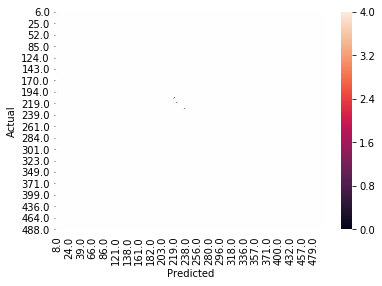

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')
plt.show()

##### Feature Importances 

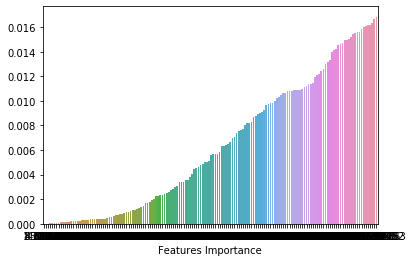

In [8]:
featureImportances = pd.Series(clf.feature_importances_).sort_values(ascending=False)
sns.barplot(x=round(featureImportances,8), y=featureImportances)
plt.xlabel('Features Importance')
plt.show()

In [9]:
X = sensorama_4[[ 'xlogp','fsp3', 'small rings','arom rings','ring blocks','arom blocks','rings 3','rings 4', 'rings 5', 'rings 6',
               'rings 7','tpsa efficiency', 'zagreb indices', 'weiner path', 'weiner polarity', 'wtpt.1',
               'wtpt.2', 'wtpt.3', 'wtpt.4', 'wtpt.5', 'molecular weight', 'VAdjMat', 'topoPSA', 'lipinski failures', 'rotatable bonds',
               'topo shape', 'petitjean number', 'mdec.11', 'mdec.12', 'mdec.13', 'mdec.14', 'mdec.22', 'mdec.23', 'mdec.24',
               'mdec.33', 'mdec.34', 'mdec.44', 'mdeo.11', 'mdeo.12', 'mdeo.22', 'mden.11', 'mden.12','mden.22',
               'mden.23', 'mden.33', 'mlogp', 'atom p', 'atom lc', 
                 'khs.sch3', 'khs.dch2', 'khs.ssch2', 'khs.tch', 'khs.dsch', 'khs.aach', 'khs.sssch', 'khs.ddc',
               'khs.tsc', 'khs.dssc', 'khs.aasc', 'khs.aaac', 'khs.ssssc', 'khs.snh2', 'khs.ssnh.1',
               'khs.aanh', 'khs.tn','khs.dsn', 'khs.aan', 'khs.sssn', 'khs.dsn.1', 'khs.aasn','khs.soh',
               'khs.do', 'khs.sso', 'khs.aao', 'khs.sf', 'khs.ssih3', 
                 'khs.ssh', 'khs.ds', 'khs.sss', 'khs.aas', 'khs.dsss', 'khs.ddsss',
               'khs.scl',
               'kier 1',
               'kier 2', 'hybRatio', 'hbdon', 'hbacc', 'fragc', 'fmf', 'eccen', 'SP.0', 'SP.1', 'SP.2', 'SP.3', 'SP.4', 'SP.5', 'SP.6',
               'SP.7', 'VP.0', 'VP.1', 'VP.2', 'VP.3', 'VP.4', 'VP.5', 'VP.6', 'VP.7', 'SPC.4', 'SPC.5', 'SPC.6', 'VPC.4', 'VPC.5',
               'VPC.6', 'SC.3', 'SC.4', 'SC.5', 'SC.6', 'VC.3', 'VC.4', 'VC.5', 'VC.6', 'SCH.3', 'SCH.4', 'SCH.5', 'SCH.6', 'SCH.7',
               'VCH.3', 'VCH.4', 'VCH.3', 'VCH.4', 'VCH.5', 'VCH.6', 'VCH.7', 'C1SP1', 'C2SP1', 'C1SP2', 'C2SP2', 'C3SP2', 'C1SP3',
               'C2SP3', 'C3SP3', 'C4SP3', 'bpol', 'bond count', 'basic group count', 'atsp1', 'atsp2' , 'atsp3', 'atsp4', 'atsp5',
               'atsm1', 'atsm2','atsm3','atsm4','atsm5', 'natom', 'apol','alogp', 'alogp2', 'amr', 'acid']]
y = sensorama_4['odor name']

Accuracy:  6.331168831168831 %


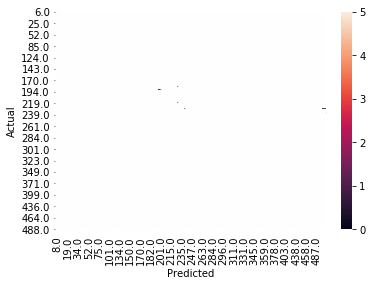

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')
plt.show()

#### SUPPORT VECTOR MACHINE 

##### rbf Kernel 

In [11]:
X_tr, X_tst, y_tr, y_tst = train_test_split(X, y, test_size=25/100,random_state=109)
clf = svm.SVC(kernel='rbf') # creating Support Vector Machine model
clf.fit(X_tr, y_tr) # training the Model
y_pr = clf.predict(X_tst) # making Predictions

# Evaluating Prediction Accuracy
print("Accuracy:",metrics.accuracy_score(y_tst, y_pr)*100,"%")

Accuracy: 6.493506493506493 %


##### Polynomial Kernel


In [12]:
X_tr, X_tst, y_tr, y_tst = train_test_split(X, y, test_size=25/100,random_state=109)
clf = svm.SVC(kernel='poly') # Creating Support Vector Machine Model
clf.fit(X_tr,y_tr) # fit classifier to training set
y_pr = clf.predict(X_tst) # Making Predictions

# Evaluating Prediction Accuracy
print("Accuracy:",metrics.accuracy_score(y_tst, y_pr)*100,"%")

Accuracy: 4.058441558441558 %


##### Sigmoid Kernel 

In [13]:
X_tr, X_tst, y_tr, y_tst = train_test_split(X, y, test_size=25/100,random_state=109)
clf=svm.SVC(kernel='sigmoid') # instantiate classifier with sigmoid kernel
clf.fit(X_tr,y_tr) # fit classifier to training set
y_pr = clf.predict(X_tst) # Making Predictions

# Evaluating Prediction Accuracy
print("Accuracy:",metrics.accuracy_score(y_tst, y_pr)*100,"%")

Accuracy: 6.0064935064935066 %


#### DECISION TREE

In [14]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
clf = DecisionTreeClassifier() # Create Decision Tree classifer object
clf = clf.fit(X_train,y_train) # Train Decision Tree Classifer
y_pred = clf.predict(X_test) # Predict the response for test dataset

# how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,"%")

Accuracy: 4.7361299052774015 %


#### LOGISTIC REGRESSION 

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
clf= LogisticRegression( max_iter=100000000)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')

Accuracy:  6.8181818181818175 %


#### K-Nearest Neighbor 

Text(0, 0.5, 'Accuracy')

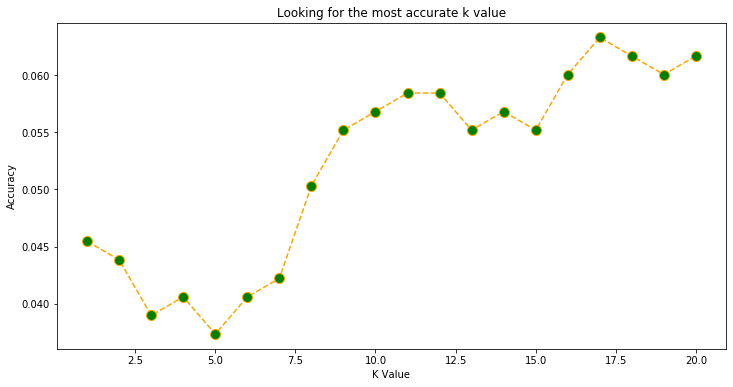

In [16]:
# Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
accuracy=[]
for i in range(1,21):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    ypred = clf.predict(X_test)
    accuracy.append(metrics.accuracy_score(y_test, ypred))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 21), accuracy, color='orange', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=10)
plt.title('Looking for the most accurate k value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

In [17]:
clf = KNeighborsClassifier(n_neighbors=17)
clf.fit(X_train, y_train)
ypred = clf.predict(X_test)

# Best accuracy
print("Accuracy:",metrics.accuracy_score(y_test, ypred)*100,"%")

Accuracy: 6.331168831168831 %


### 25 MOST COMMON ODOR NAMES 

In [20]:
sensorama_4 = sensorama_4.sort_values('odor name')

In [33]:
sensorama2_4=[]

for i in range(18 , len(sensorama_4)-18):
    if sensorama_4.iloc[i,4] == sensorama_4.iloc[i+18,4] or sensorama_4.iloc[i,4] == sensorama_4.iloc[i-18,4]:
        sensorama2_4.append(sensorama_4.iloc[i,:]) 

sensorama2_4= pd.DataFrame(sensorama2_4)
sensorama2_4

,cid,canonical_smiles,xlogp,odor level,odor name,fsp3,small rings,arom rings,ring blocks,arom blocks,...,atsm4,atsm5,natom,arom bond,arom atom,apol,alogp,alogp2,amr,acid
15403,5978897.000000,1792.000000,-0.070389,4.000000,25.000000,-0.519433,-0.878056,-0.631781,-1.106175,-0.644741,...,-0.251837,-0.431902,-0.092074,0.000000,0.000000,-0.129645,0.130753,-0.121204,-0.037739,-0.161598
10728,118782.000000,516.000000,0.068650,4.000000,25.000000,0.229345,-0.878056,-0.631781,-1.106175,-0.644741,...,-0.895942,-0.623930,0.014035,0.000000,0.000000,-0.074694,0.222353,-0.043838,-0.253475,-0.161598
6901,61955.000000,2355.000000,-0.487506,4.000000,25.000000,-0.519433,0.200130,1.183366,0.632666,1.285620,...,-0.236607,0.047900,-0.198182,0.000000,0.000000,-0.184596,-0.781079,-0.685375,-0.082631,-0.161598
12877,641832.000000,2235.000000,-0.487506,4.000000,25.000000,0.817511,-0.878056,-0.631781,-1.106175,-0.644741,...,-0.574145,-0.720210,-0.622616,0.000000,0.000000,-0.813284,-0.267913,-0.413918,-1.081532,-0.161598
14594,5364230.000000,2138.000000,-0.696065,4.000000,25.000000,0.282883,-0.878056,-0.631781,-1.106175,-0.644741,...,-1.310557,-1.056392,-0.728725,0.000000,0.000000,-0.896186,-0.417734,-0.505430,-0.990709,-0.161598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4287,18756.000000,359.000000,1.041924,4.000000,494.000000,-0.893823,-0.878056,-0.631781,-1.106175,-0.644741,...,-0.941840,-0.815957,-0.304291,0.000000,0.000000,-0.295448,0.822400,0.556387,-0.189373,-0.161598
15473,6285057.000000,1527.000000,-0.070389,4.000000,494.000000,-0.087388,0.200130,-0.631781,0.632666,-0.644741,...,0.486109,0.529302,0.544577,0.000000,0.000000,0.608945,0.428383,0.143977,0.647203,-0.161598
14821,5365819.000000,926.000000,0.763846,4.000000,494.000000,-0.087388,-0.878056,-0.631781,-1.106175,-0.644741,...,-0.020813,0.672923,0.862903,0.000000,0.000000,0.829689,0.861677,0.601330,0.811727,-0.161598
1684,7921.000000,1575.000000,-1.530300,4.000000,494.000000,0.603735,0.200130,-0.631781,0.632666,-0.644741,...,-1.402864,-1.488854,-1.471484,0.000000,0.000000,-1.590699,-1.245601,-0.828865,-1.807172,-0.161598


In [34]:
count=0
for i in range(1, len(sensorama2_4)):
    if sensorama2_4.iloc[i,4]!= sensorama2_4.iloc[i-1,4]:
        count = count +1
print(count)

26


In [35]:
X = sensorama2_4[[ 'xlogp','fsp3', 'small rings','arom rings','ring blocks','arom blocks','rings 3','rings 4', 'rings 5', 'rings 6',
               'rings 7', 'rings 8', 'rings 9', 'tpsa efficiency', 'zagreb indices', 'weiner path', 'weiner polarity', 'wtpt.1',
               'wtpt.2', 'wtpt.3', 'wtpt.4', 'wtpt.5', 'molecular weight', 'VAdjMat', 'topoPSA', 'lipinski failures', 'rotatable bonds',
               'topo shape', 'petitjean number', 'mdec.11', 'mdec.12', 'mdec.13', 'mdec.14', 'mdec.22', 'mdec.23', 'mdec.24',
               'mdec.33', 'mdec.34', 'mdec.44', 'mdeo.11', 'mdeo.12', 'mdeo.22', 'mden.11', 'mden.12', 'mden.13', 'mden.22',
               'mden.23', 'mden.33', 'mlogp', 'atom p', 'atom lc', 'khs.sli', 'khs.ssbe', 'khs.ssssbe', 'khs.ssbh', 'khs.sssb',
               'khs.ssssb', 'khs.sch3', 'khs.dch2', 'khs.ssch2', 'khs.tch', 'khs.dsch', 'khs.aach', 'khs.sssch', 'khs.ddc',
               'khs.tsc', 'khs.dssc', 'khs.aasc', 'khs.aaac', 'khs.ssssc', 'khs.snh3', 'khs.snh2', 'khs.ssnh', 'khs.dnh', 'khs.ssnh.1',
               'khs.aanh', 'khs.tn', 'khs.sssnh', 'khs.dsn', 'khs.aan', 'khs.sssn', 'khs.dsn.1', 'khs.aasn', 'khs.ssssn', 'khs.soh',
               'khs.do', 'khs.sso', 'khs.aao', 'khs.sf', 'khs.ssih3', 'khs.sssih2', 'khs.ssssih', 'khs.sssssi', 'khs.sph2',
               'khs.ssph', 'khs.sssp', 'khs.dsssp', 'khs.sssssp', 'khs.ssh', 'khs.ds', 'khs.sss', 'khs.aas', 'khs.dsss', 'khs.ddsss',
               'khs.scl', 'khs.sGeH3', 'khs.ssGeH2', 'khs.sssGeH', 'khs.ssssGe', 'khs.sash2', 'khs.ssash', 'khs.sssas', 'khs.sssdas',
               'khs.sssssas', 'khs.sseh', 'khs.dse', 'khs.ssse', 'khs.aase', 'khs.dssse', 'khs.ddssse', 'khs.sbr', 'khs.ssnh3', 
               'khs.sssnh2', 'khs.ssssnh', 'khs.sssssn', 'khs.si', 'khs.spbh3', 'khs.sspbh2', 'khs.ssspbh', 'khs.sssspb', 'kier 1',
               'kier 2', 'hybRatio', 'hbdon', 'hbacc', 'fragc', 'fmf', 'eccen', 'SP.0', 'SP.1', 'SP.2', 'SP.3', 'SP.4', 'SP.5', 'SP.6',
               'SP.7', 'VP.0', 'VP.1', 'VP.2', 'VP.3', 'VP.4', 'VP.5', 'VP.6', 'VP.7', 'SPC.4', 'SPC.5', 'SPC.6', 'VPC.4', 'VPC.5',
               'VPC.6', 'SC.3', 'SC.4', 'SC.5', 'SC.6', 'VC.3', 'VC.4', 'VC.5', 'VC.6', 'SCH.3', 'SCH.4', 'SCH.5', 'SCH.6', 'SCH.7',
               'VCH.3', 'VCH.4', 'VCH.3', 'VCH.4', 'VCH.5', 'VCH.6', 'VCH.7', 'C1SP1', 'C2SP1', 'C1SP2', 'C2SP2', 'C3SP2', 'C1SP3',
               'C2SP3', 'C3SP3', 'C4SP3', 'bpol', 'bond count', 'basic group count', 'atsp1', 'atsp2' , 'atsp3', 'atsp4', 'atsp5',
               'atsm1', 'atsm2','atsm3','atsm4','atsm5', 'natom','arom bond', 'arom atom', 'apol','alogp', 'alogp2', 'amr', 'acid']]
y = sensorama2_4['odor name']

#### RANDOM FOREST

Accuracy:  11.403508771929824 %


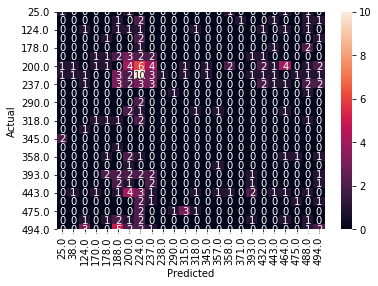

In [36]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')
plt.show()

##### Feature Importances 

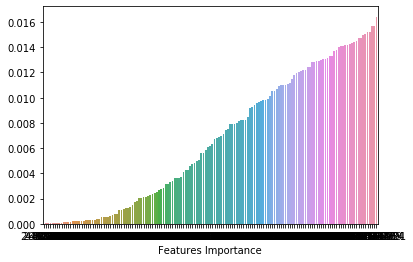

In [37]:
featureImportances = pd.Series(clf.feature_importances_).sort_values(ascending=False)
sns.barplot(x=round(featureImportances,8), y=featureImportances)
plt.xlabel('Features Importance')
plt.show()

In [38]:
X = sensorama2_4[[ 'xlogp','fsp3', 'small rings','arom rings','ring blocks','arom blocks','rings 3','rings 4', 'rings 5', 'rings 6',
               'rings 7','tpsa efficiency', 'zagreb indices', 'weiner path', 'weiner polarity', 'wtpt.1',
               'wtpt.2', 'wtpt.3', 'wtpt.4', 'wtpt.5', 'molecular weight', 'VAdjMat', 'topoPSA', 'lipinski failures', 'rotatable bonds',
               'topo shape', 'petitjean number', 'mdec.11', 'mdec.12', 'mdec.13', 'mdec.14', 'mdec.22', 'mdec.23', 'mdec.24',
               'mdec.33', 'mdec.34', 'mdec.44', 'mdeo.11', 'mdeo.12', 'mdeo.22', 'mden.22',
               'mden.23', 'mden.33', 'mlogp', 'atom p', 'atom lc', 
                  'khs.sch3', 'khs.dch2', 'khs.ssch2', 'khs.tch', 'khs.dsch', 'khs.aach', 'khs.sssch', 'khs.ddc',
               'khs.tsc', 'khs.dssc', 'khs.aasc', 'khs.aaac', 'khs.ssssc', 'khs.snh2', 'khs.ssnh.1',
               'khs.aanh', 'khs.tn', 'khs.dsn', 'khs.aan', 'khs.sssn', 'khs.dsn.1', 'khs.aasn', 'khs.soh',
               'khs.do', 'khs.sso', 'khs.aao', 'khs.ssh', 'khs.ds', 'khs.sss', 'khs.aas', 'khs.dsss', 'kier 1',
               'kier 2', 'hybRatio', 'hbdon', 'hbacc', 'fragc', 'fmf', 'eccen', 'SP.0', 'SP.1', 'SP.2', 'SP.3', 'SP.4', 'SP.5', 'SP.6',
               'SP.7', 'VP.0', 'VP.1', 'VP.2', 'VP.3', 'VP.4', 'VP.5', 'VP.6', 'VP.7', 'SPC.4', 'SPC.5', 'SPC.6', 'VPC.4', 'VPC.5',
               'VPC.6', 'SC.3', 'SC.4', 'SC.5', 'SC.6', 'VC.3', 'VC.4', 'VC.5', 'VC.6', 'SCH.3', 'SCH.4', 'SCH.5', 'SCH.6', 'SCH.7',
               'VCH.3', 'VCH.4', 'VCH.3', 'VCH.4', 'VCH.5', 'VCH.6', 'VCH.7', 'C1SP1', 'C2SP1', 'C1SP2', 'C2SP2', 'C3SP2', 'C1SP3',
               'C2SP3', 'C3SP3', 'C4SP3', 'bpol', 'bond count', 'basic group count', 'atsp1', 'atsp2' , 'atsp3', 'atsp4', 'atsp5',
               'atsm1', 'atsm2','atsm3','atsm4','atsm5', 'natom','apol','alogp', 'alogp2', 'amr', 'acid']]
y = sensorama2_4['odor name']

Accuracy:  10.526315789473683 %


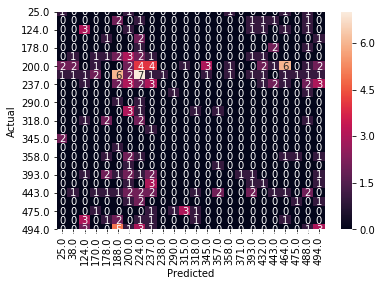

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')
plt.show()

#### SUPPORT VECTOR MACHINE 

##### rbf Kernel 

In [40]:
X_tr, X_tst, y_tr, y_tst = train_test_split(X, y, test_size=25/100,random_state=109)
clf = svm.SVC(kernel='rbf') # creating Support Vector Machine model
clf.fit(X_tr, y_tr) # training the Model
y_pr = clf.predict(X_tst) # making Predictions

# Evaluating Prediction Accuracy
print("Accuracy:",metrics.accuracy_score(y_tst, y_pr)*100,"%")

Accuracy: 14.035087719298245 %


##### Polynomial Kernel


In [41]:
X_tr, X_tst, y_tr, y_tst = train_test_split(X, y, test_size=25/100,random_state=109)
clf = svm.SVC(kernel='poly') # Creating Support Vector Machine Model
clf.fit(X_tr,y_tr) # fit classifier to training set
y_pr = clf.predict(X_tst) # Making Predictions

# Evaluating Prediction Accuracy
print("Accuracy:",metrics.accuracy_score(y_tst, y_pr)*100,"%")

Accuracy: 12.719298245614036 %


##### Sigmoid Kernel 

In [42]:
X_tr, X_tst, y_tr, y_tst = train_test_split(X, y, test_size=25/100,random_state=109)
clf=svm.SVC(kernel='sigmoid') # instantiate classifier with sigmoid kernel
clf.fit(X_tr,y_tr) # fit classifier to training set
y_pr = clf.predict(X_tst) # Making Predictions

# Evaluating Prediction Accuracy
print("Accuracy:",metrics.accuracy_score(y_tst, y_pr)*100,"%")

Accuracy: 12.719298245614036 %


#### DECISION TREE

In [43]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
clf = DecisionTreeClassifier() # Create Decision Tree classifer object
clf = clf.fit(X_train,y_train) # Train Decision Tree Classifer
y_pred = clf.predict(X_test) # Predict the response for test dataset

# how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,"%")

Accuracy: 8.791208791208792 %


#### LOGISTIC REGRESSION 

In [44]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
clf= LogisticRegression( max_iter=100000000)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')

Accuracy:  13.157894736842104 %


#### K-Nearest Neighbor 

Text(0, 0.5, 'Accuracy')

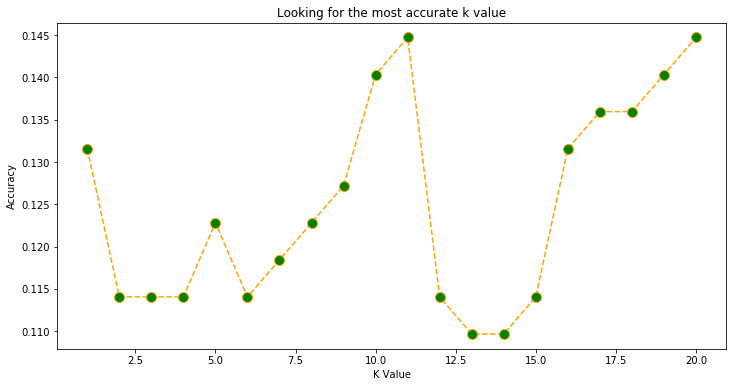

In [45]:
# Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
accuracy=[]
for i in range(1,21):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    ypred = clf.predict(X_test)
    accuracy.append(metrics.accuracy_score(y_test, ypred))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 21), accuracy, color='orange', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=10)
plt.title('Looking for the most accurate k value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

In [46]:
clf = KNeighborsClassifier(n_neighbors=11)
clf.fit(X_train, y_train)
ypred = clf.predict(X_test)

# Best accuracy
print("Accuracy:",metrics.accuracy_score(y_test, ypred)*100,"%")

Accuracy: 14.473684210526317 %


### 15 MOST COMMON ODOR NAMES 

In [41]:
sensorama_4 = sensorama_4 .sort_values('odor name')

In [51]:
sensorama2_4=[]

for i in range(29, len(sensorama_4)-29):
    if sensorama_4.iloc[i,4] == sensorama_4.iloc[i+29,4] or sensorama_4.iloc[i,4] == sensorama_4.iloc[i-29,4]:
        sensorama2_4.append(sensorama_4.iloc[i,:]) 

sensorama2_4= pd.DataFrame(sensorama2_4)
sensorama2_4

,cid,canonical_smiles,xlogp,odor level,odor name,fsp3,small rings,arom rings,ring blocks,arom blocks,...,atsm4,atsm5,natom,arom bond,arom atom,apol,alogp,alogp2,amr,acid
12941,643723.000000,357.000000,2.501836,4.000000,38.000000,0.603735,1.278317,-0.631781,0.632666,-0.644741,...,3.480211,3.700157,2.772856,0.000000,0.000000,2.847404,1.887593,2.021194,2.609406,-0.161598
12778,637195.000000,824.000000,4.170305,4.000000,38.000000,0.841846,-0.878056,-0.631781,-1.106175,-0.644741,...,1.361237,1.778281,3.940049,0.000000,0.000000,3.845563,3.655258,5.579249,3.470610,-0.161598
10700,118262.000000,2248.000000,-0.557026,4.000000,38.000000,-0.051447,-0.878056,-0.631781,-1.106175,-0.644741,...,-0.665941,-0.239875,-0.516508,0.000000,0.000000,-0.631355,-0.314823,-0.443663,-0.800006,-0.161598
91,307.000000,54.000000,-0.626545,4.000000,38.000000,-2.391380,0.200130,1.183366,0.632666,1.285620,...,-0.757737,-0.768084,-1.153159,0.000000,0.000000,-0.945885,-0.670188,-0.636757,-0.392422,-0.161598
8557,86749.000000,1905.000000,0.138170,4.000000,124.000000,0.603735,-0.878056,-0.631781,-1.106175,-0.644741,...,-0.573634,-0.623930,0.226252,0.000000,0.000000,0.063158,0.376199,0.094600,-0.132868,-0.161598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4655,21648.000000,507.000000,-0.904624,4.000000,494.000000,-1.268212,0.200130,1.183366,0.632666,1.285620,...,-0.251326,-0.431902,-0.516508,0.000000,0.000000,-0.405350,-1.087522,-0.790936,-0.070925,-0.161598
15876,6433191.000000,432.000000,4.726462,4.000000,494.000000,0.853452,2.356503,-0.631781,2.371507,-0.644741,...,5.967902,6.006621,5.743894,0.000000,0.000000,5.907344,4.331499,7.312456,5.465959,-0.161598
10034,107166.000000,1106.000000,1.320003,4.000000,494.000000,1.352513,2.356503,-0.631781,0.632666,-0.644741,...,2.743288,2.643205,1.711771,0.000000,0.000000,1.706131,0.889087,0.633102,1.246660,-0.161598
7847,74279.000000,3204.000000,-0.278948,4.000000,494.000000,1.352513,0.200130,-0.631781,0.632666,-0.644741,...,0.300983,0.384615,0.332360,0.000000,0.000000,0.146060,-0.237033,-0.393810,-0.155971,-0.161598


In [52]:
count=0
for i in range(1, len(sensorama2_4)):
    if sensorama2_4.iloc[i,4]!= sensorama2_4.iloc[i-1,4]:
        count = count +1
print(count)

14


In [53]:
X = sensorama2_4[[ 'xlogp','fsp3', 'small rings','arom rings','ring blocks','arom blocks','rings 3','rings 4', 'rings 5', 'rings 6',
               'rings 7', 'rings 8', 'rings 9', 'tpsa efficiency', 'zagreb indices', 'weiner path', 'weiner polarity', 'wtpt.1',
               'wtpt.2', 'wtpt.3', 'wtpt.4', 'wtpt.5', 'molecular weight', 'VAdjMat', 'topoPSA', 'lipinski failures', 'rotatable bonds',
               'topo shape', 'petitjean number', 'mdec.11', 'mdec.12', 'mdec.13', 'mdec.14', 'mdec.22', 'mdec.23', 'mdec.24',
               'mdec.33', 'mdec.34', 'mdec.44', 'mdeo.11', 'mdeo.12', 'mdeo.22', 'mden.11', 'mden.12', 'mden.13', 'mden.22',
               'mden.23', 'mden.33', 'mlogp', 'atom p', 'atom lc', 'khs.sli', 'khs.ssbe', 'khs.ssssbe', 'khs.ssbh', 'khs.sssb',
               'khs.ssssb', 'khs.sch3', 'khs.dch2', 'khs.ssch2', 'khs.tch', 'khs.dsch', 'khs.aach', 'khs.sssch', 'khs.ddc',
               'khs.tsc', 'khs.dssc', 'khs.aasc', 'khs.aaac', 'khs.ssssc', 'khs.snh3', 'khs.snh2', 'khs.ssnh', 'khs.dnh', 'khs.ssnh.1',
               'khs.aanh', 'khs.tn', 'khs.sssnh', 'khs.dsn', 'khs.aan', 'khs.sssn', 'khs.dsn.1', 'khs.aasn', 'khs.ssssn', 'khs.soh',
               'khs.do', 'khs.sso', 'khs.aao', 'khs.sf', 'khs.ssih3', 'khs.sssih2', 'khs.ssssih', 'khs.sssssi', 'khs.sph2',
               'khs.ssph', 'khs.sssp', 'khs.dsssp', 'khs.sssssp', 'khs.ssh', 'khs.ds', 'khs.sss', 'khs.aas', 'khs.dsss', 'khs.ddsss',
               'khs.scl', 'khs.sGeH3', 'khs.ssGeH2', 'khs.sssGeH', 'khs.ssssGe', 'khs.sash2', 'khs.ssash', 'khs.sssas', 'khs.sssdas',
               'khs.sssssas', 'khs.sseh', 'khs.dse', 'khs.ssse', 'khs.aase', 'khs.dssse', 'khs.ddssse', 'khs.sbr', 'khs.ssnh3', 
               'khs.sssnh2', 'khs.ssssnh', 'khs.sssssn', 'khs.si', 'khs.spbh3', 'khs.sspbh2', 'khs.ssspbh', 'khs.sssspb', 'kier 1',
               'kier 2', 'hybRatio', 'hbdon', 'hbacc', 'fragc', 'fmf', 'eccen', 'SP.0', 'SP.1', 'SP.2', 'SP.3', 'SP.4', 'SP.5', 'SP.6',
               'SP.7', 'VP.0', 'VP.1', 'VP.2', 'VP.3', 'VP.4', 'VP.5', 'VP.6', 'VP.7', 'SPC.4', 'SPC.5', 'SPC.6', 'VPC.4', 'VPC.5',
               'VPC.6', 'SC.3', 'SC.4', 'SC.5', 'SC.6', 'VC.3', 'VC.4', 'VC.5', 'VC.6', 'SCH.3', 'SCH.4', 'SCH.5', 'SCH.6', 'SCH.7',
               'VCH.3', 'VCH.4', 'VCH.3', 'VCH.4', 'VCH.5', 'VCH.6', 'VCH.7', 'C1SP1', 'C2SP1', 'C1SP2', 'C2SP2', 'C3SP2', 'C1SP3',
               'C2SP3', 'C3SP3', 'C4SP3', 'bpol', 'bond count', 'basic group count', 'atsp1', 'atsp2' , 'atsp3', 'atsp4', 'atsp5',
               'atsm1', 'atsm2','atsm3','atsm4','atsm5', 'natom','arom bond', 'arom atom', 'apol','alogp', 'alogp2', 'amr', 'acid']]
y = sensorama2_4['odor name']

#### RANDOM FOREST

Accuracy:  20.945945945945947 %


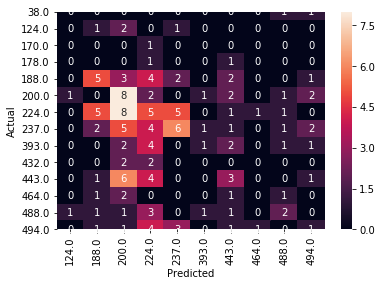

In [54]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')
plt.show()

##### Feature Importances 

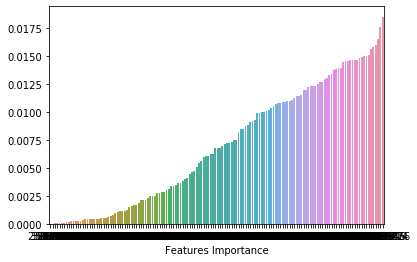

In [55]:
featureImportances = pd.Series(clf.feature_importances_).sort_values(ascending=False)
sns.barplot(x=round(featureImportances,8), y=featureImportances)
plt.xlabel('Features Importance')
plt.show()

In [56]:
X = sensorama2_4[[ 'xlogp','fsp3', 'small rings','arom rings','ring blocks','arom blocks','rings 3','rings 4', 'rings 5', 'rings 6',
               'rings 7', 'tpsa efficiency', 'zagreb indices', 'weiner path', 'weiner polarity', 'wtpt.1',
               'wtpt.2', 'wtpt.3', 'wtpt.4', 'wtpt.5', 'molecular weight', 'VAdjMat', 'topoPSA', 'lipinski failures', 'rotatable bonds',
               'topo shape', 'petitjean number', 'mdec.11', 'mdec.12', 'mdec.13', 'mdec.14', 'mdec.22', 'mdec.23', 'mdec.24',
               'mdec.33', 'mdec.34', 'mdec.44', 'mdeo.11', 'mdeo.12', 'mdeo.22', 'mden.22',
               'mden.23', 'mlogp', 'atom p', 'atom lc',
                  'khs.sch3', 'khs.dch2', 'khs.ssch2','khs.dsch', 'khs.aach', 'khs.sssch', 'khs.ddc',
               'khs.tsc', 'khs.dssc', 'khs.aasc', 'khs.aaac', 'khs.ssssc', 'khs.snh2', 'khs.ssnh.1',
               'khs.tn', 'khs.dsn', 'khs.aan', 'khs.sssn', 'khs.dsn.1', 'khs.aasn', 'khs.soh',
               'khs.do', 'khs.sso', 'khs.aao','khs.ssh', 'khs.ds', 'khs.sss', 'khs.aas', 'khs.dsss','kier 1',
               'kier 2', 'hybRatio', 'hbdon', 'hbacc', 'fragc', 'fmf', 'eccen', 'SP.0', 'SP.1', 'SP.2', 'SP.3', 'SP.4', 'SP.5', 'SP.6',
               'SP.7', 'VP.0', 'VP.1', 'VP.2', 'VP.3', 'VP.4', 'VP.5', 'VP.6', 'VP.7', 'SPC.4', 'SPC.5', 'SPC.6', 'VPC.4', 'VPC.5',
               'VPC.6', 'SC.3', 'SC.4', 'SC.5', 'SC.6', 'VC.3', 'VC.4', 'VC.5', 'VC.6', 'SCH.3', 'SCH.4', 'SCH.5', 'SCH.6', 'SCH.7',
               'VCH.3', 'VCH.4', 'VCH.3', 'VCH.4', 'VCH.5', 'VCH.6', 'VCH.7', 'C1SP1', 'C2SP1', 'C1SP2', 'C2SP2', 'C3SP2', 'C1SP3',
               'C2SP3', 'C3SP3', 'C4SP3', 'bpol', 'bond count', 'basic group count', 'atsp1', 'atsp2' , 'atsp3', 'atsp4', 'atsp5',
               'atsm1', 'atsm2','atsm3','atsm4','atsm5', 'natom', 'apol','alogp', 'alogp2', 'amr', 'acid']]
y = sensorama2_4['odor name']

Accuracy:  22.2972972972973 %


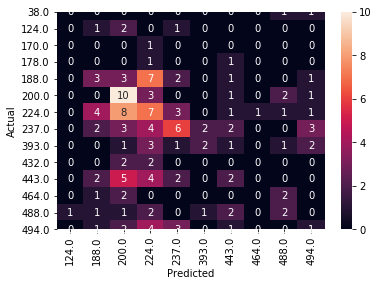

In [57]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')
plt.show()

#### SUPPORT VECTOR MACHINE 

##### rbf Kernel 

In [58]:
X_tr, X_tst, y_tr, y_tst = train_test_split(X, y, test_size=25/100,random_state=109)
clf = svm.SVC(kernel='rbf') # creating Support Vector Machine model
clf.fit(X_tr, y_tr) # training the Model
y_pr = clf.predict(X_tst) # making Predictions

# Evaluating Prediction Accuracy
print("Accuracy:",metrics.accuracy_score(y_tst, y_pr)*100,"%")

Accuracy: 27.7027027027027 %


##### Polynomial Kernel


In [59]:
X_tr, X_tst, y_tr, y_tst = train_test_split(X, y, test_size=25/100,random_state=109)
clf = svm.SVC(kernel='poly') # Creating Support Vector Machine Model
clf.fit(X_tr,y_tr) # fit classifier to training set
y_pr = clf.predict(X_tst) # Making Predictions

# Evaluating Prediction Accuracy
print("Accuracy:",metrics.accuracy_score(y_tst, y_pr)*100,"%")

Accuracy: 20.945945945945947 %


##### Sigmoid Kernel 

In [60]:
X_tr, X_tst, y_tr, y_tst = train_test_split(X, y, test_size=25/100,random_state=109)
clf=svm.SVC(kernel='sigmoid') # instantiate classifier with sigmoid kernel
clf.fit(X_tr,y_tr) # fit classifier to training set
y_pr = clf.predict(X_tst) # Making Predictions

# Evaluating Prediction Accuracy
print("Accuracy:",metrics.accuracy_score(y_tst, y_pr)*100,"%")

Accuracy: 20.27027027027027 %


#### DECISION TREE

In [61]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
clf = DecisionTreeClassifier() # Create Decision Tree classifer object
clf = clf.fit(X_train,y_train) # Train Decision Tree Classifer
y_pred = clf.predict(X_test) # Predict the response for test dataset

# how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,"%")

Accuracy: 13.559322033898304 %


#### LOGISTIC REGRESSION 

In [62]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
clf= LogisticRegression( max_iter=100000000)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')

Accuracy:  16.89189189189189 %


#### K-Nearest Neighbor 

Text(0, 0.5, 'Accuracy')

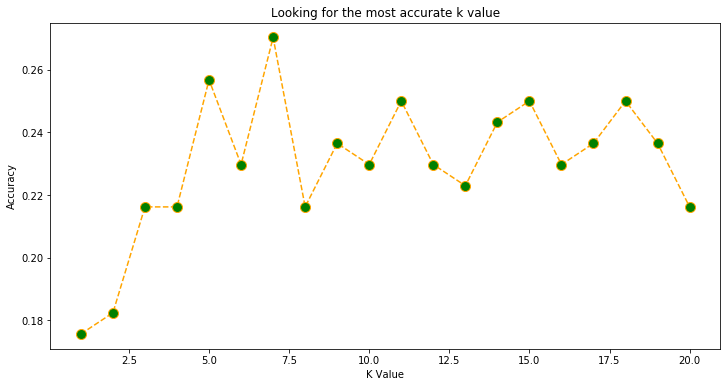

In [63]:
# Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
accuracy=[]
for i in range(1,21):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    ypred = clf.predict(X_test)
    accuracy.append(metrics.accuracy_score(y_test, ypred))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 21), accuracy, color='orange', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=10)
plt.title('Looking for the most accurate k value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

In [64]:
clf = KNeighborsClassifier(n_neighbors=7)
clf.fit(X_train, y_train)
ypred = clf.predict(X_test)

# Best accuracy
print("Accuracy:",metrics.accuracy_score(y_test, ypred)*100,"%")

Accuracy: 27.027027027027028 %


### 10 MOST COMMON ODOR NAMES 

In [65]:
sensorama_4 = sensorama_4.sort_values('odor name')

In [73]:
sensorama2_4=[]

for i in range(34, len(sensorama_4)-34):
    if sensorama_4.iloc[i,4] == sensorama_4.iloc[i+34,4] or sensorama_4.iloc[i,4] == sensorama_4.iloc[i-34,4]:
        sensorama2_4.append(sensorama_4.iloc[i,:]) 

sensorama2_4= pd.DataFrame(sensorama2_4)
sensorama2_4

,cid,canonical_smiles,xlogp,odor level,odor name,fsp3,small rings,arom rings,ring blocks,arom blocks,...,atsm4,atsm5,natom,arom bond,arom atom,apol,alogp,alogp2,amr,acid
2096,8194.000000,2827.000000,1.459042,4.000000,124.000000,1.040647,-0.878056,-0.631781,-1.106175,-0.644741,...,-0.619532,-0.335622,0.862903,0.000000,0.000000,0.702711,1.485873,1.408762,0.353873,-0.161598
8711,89307.000000,2523.000000,0.972405,4.000000,124.000000,1.040647,-0.878056,-0.631781,-1.106175,-0.644741,...,0.116880,0.576642,0.969011,0.000000,0.000000,0.785612,1.275124,1.116536,0.413029,-0.161598
17904,66823518.000000,1568.000000,1.459042,4.000000,178.000000,0.603735,-0.878056,-0.631781,0.632666,-0.644741,...,0.532007,1.201665,1.393445,0.000000,0.000000,1.386350,1.514324,1.449749,1.202266,-0.161598
3955,16331.000000,3003.000000,-1.252222,4.000000,178.000000,0.520620,-0.878056,-0.631781,-1.106175,-0.644741,...,-0.435940,-0.144128,-0.092074,0.000000,0.000000,-0.228672,-0.897522,-0.730470,-0.432845,-0.161598
13938,5318599.000000,2595.000000,-0.209428,4.000000,178.000000,0.416540,-0.878056,-0.631781,-1.106175,-0.644741,...,-1.172352,-0.912238,-0.410399,0.000000,0.000000,-0.576404,0.025622,-0.205345,-0.709542,-0.161598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3773,15173.000000,3359.000000,-0.765585,4.000000,494.000000,-2.016991,0.200130,1.183366,0.632666,1.285620,...,0.070982,0.048433,-0.728725,0.000000,0.000000,-0.543202,-1.016185,-0.770144,0.042262,-0.161598
5917,61060.000000,1064.000000,-0.070389,4.000000,494.000000,1.352513,2.356503,-0.631781,0.632666,-0.644741,...,0.762008,-1.104799,0.014035,0.000000,0.000000,-0.074694,-0.328702,-0.452270,-0.460097,-0.161598
1444,7733.000000,884.000000,-0.348467,4.000000,494.000000,-0.349086,0.200130,1.183366,0.632666,1.285620,...,-0.113632,0.096307,0.120143,0.000000,0.000000,0.135186,-0.746868,-0.670969,0.230060,-0.161598
16242,6437737.000000,1749.000000,-0.765585,4.000000,494.000000,0.416540,3.434689,-0.631781,0.632666,-0.644741,...,0.992009,0.625049,0.120143,0.000000,0.000000,0.234213,-0.145642,-0.331750,0.091126,-0.161598


In [74]:
count=0
for i in range(1, len(sensorama2_4)):
    if sensorama2_4.iloc[i,4]!= sensorama2_4.iloc[i-1,4]:
        count = count +1
print(count)

11


In [75]:
X = sensorama2_4[[ 'xlogp','fsp3', 'small rings','arom rings','ring blocks','arom blocks','rings 3','rings 4', 'rings 5', 'rings 6',
               'rings 7', 'rings 8', 'rings 9', 'tpsa efficiency', 'zagreb indices', 'weiner path', 'weiner polarity', 'wtpt.1',
               'wtpt.2', 'wtpt.3', 'wtpt.4', 'wtpt.5', 'molecular weight', 'VAdjMat', 'topoPSA', 'lipinski failures', 'rotatable bonds',
               'topo shape', 'petitjean number', 'mdec.11', 'mdec.12', 'mdec.13', 'mdec.14', 'mdec.22', 'mdec.23', 'mdec.24',
               'mdec.33', 'mdec.34', 'mdec.44', 'mdeo.11', 'mdeo.12', 'mdeo.22', 'mden.11', 'mden.12', 'mden.13', 'mden.22',
               'mden.23', 'mden.33', 'mlogp', 'atom p', 'atom lc', 'khs.sli', 'khs.ssbe', 'khs.ssssbe', 'khs.ssbh', 'khs.sssb',
               'khs.ssssb', 'khs.sch3', 'khs.dch2', 'khs.ssch2', 'khs.tch', 'khs.dsch', 'khs.aach', 'khs.sssch', 'khs.ddc',
               'khs.tsc', 'khs.dssc', 'khs.aasc', 'khs.aaac', 'khs.ssssc', 'khs.snh3', 'khs.snh2', 'khs.ssnh', 'khs.dnh', 'khs.ssnh.1',
               'khs.aanh', 'khs.tn', 'khs.sssnh', 'khs.dsn', 'khs.aan', 'khs.sssn', 'khs.dsn.1', 'khs.aasn', 'khs.ssssn', 'khs.soh',
               'khs.do', 'khs.sso', 'khs.aao', 'khs.sf', 'khs.ssih3', 'khs.sssih2', 'khs.ssssih', 'khs.sssssi', 'khs.sph2',
               'khs.ssph', 'khs.sssp', 'khs.dsssp', 'khs.sssssp', 'khs.ssh', 'khs.ds', 'khs.sss', 'khs.aas', 'khs.dsss', 'khs.ddsss',
               'khs.scl', 'khs.sGeH3', 'khs.ssGeH2', 'khs.sssGeH', 'khs.ssssGe', 'khs.sash2', 'khs.ssash', 'khs.sssas', 'khs.sssdas',
               'khs.sssssas', 'khs.sseh', 'khs.dse', 'khs.ssse', 'khs.aase', 'khs.dssse', 'khs.ddssse', 'khs.sbr', 'khs.ssnh3', 
               'khs.sssnh2', 'khs.ssssnh', 'khs.sssssn', 'khs.si', 'khs.spbh3', 'khs.sspbh2', 'khs.ssspbh', 'khs.sssspb', 'kier 1',
               'kier 2', 'hybRatio', 'hbdon', 'hbacc', 'fragc', 'fmf', 'eccen', 'SP.0', 'SP.1', 'SP.2', 'SP.3', 'SP.4', 'SP.5', 'SP.6',
               'SP.7', 'VP.0', 'VP.1', 'VP.2', 'VP.3', 'VP.4', 'VP.5', 'VP.6', 'VP.7', 'SPC.4', 'SPC.5', 'SPC.6', 'VPC.4', 'VPC.5',
               'VPC.6', 'SC.3', 'SC.4', 'SC.5', 'SC.6', 'VC.3', 'VC.4', 'VC.5', 'VC.6', 'SCH.3', 'SCH.4', 'SCH.5', 'SCH.6', 'SCH.7',
               'VCH.3', 'VCH.4', 'VCH.3', 'VCH.4', 'VCH.5', 'VCH.6', 'VCH.7', 'C1SP1', 'C2SP1', 'C1SP2', 'C2SP2', 'C3SP2', 'C1SP3',
               'C2SP3', 'C3SP3', 'C4SP3', 'bpol', 'bond count', 'basic group count', 'atsp1', 'atsp2' , 'atsp3', 'atsp4', 'atsp5',
               'atsm1', 'atsm2','atsm3','atsm4','atsm5', 'natom','arom bond', 'arom atom', 'apol','alogp', 'alogp2', 'amr', 'acid']]
y = sensorama2_4['odor name']

#### RANDOM FOREST

Accuracy:  24.409448818897637 %


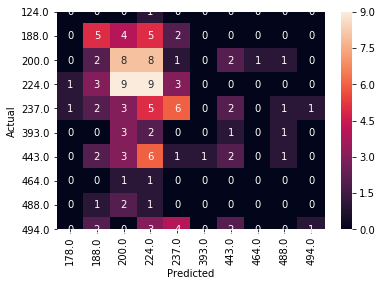

In [76]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')
plt.show()

##### Feature Importances 

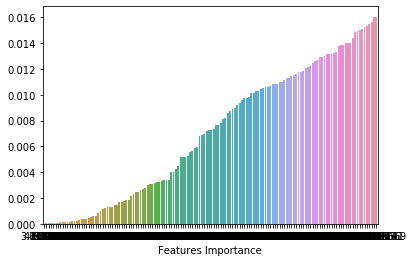

In [77]:
featureImportances = pd.Series(clf.feature_importances_).sort_values(ascending=False)
sns.barplot(x=round(featureImportances,8), y=featureImportances)
plt.xlabel('Features Importance')
plt.show()

In [79]:
X = sensorama2_4[[ 'xlogp','fsp3', 'small rings','arom rings','ring blocks','arom blocks','rings 3','rings 4', 'rings 5', 'rings 6',
               'rings 7', 'tpsa efficiency', 'zagreb indices', 'weiner path', 'weiner polarity', 'wtpt.1',
               'wtpt.2', 'wtpt.3', 'wtpt.4', 'wtpt.5', 'molecular weight', 'VAdjMat', 'topoPSA', 'lipinski failures', 'rotatable bonds',
               'topo shape', 'petitjean number', 'mdec.11', 'mdec.12', 'mdec.13', 'mdec.14', 'mdec.22', 'mdec.23', 'mdec.24',
               'mdec.33', 'mdec.34', 'mdec.44', 'mdeo.11', 'mdeo.12', 'mdeo.22', 'mden.22',
               'mden.23', 'mlogp', 'atom p', 'atom lc',
                  'khs.sch3', 'khs.dch2', 'khs.ssch2','khs.dsch', 'khs.aach', 'khs.sssch', 'khs.ddc',
               'khs.tsc', 'khs.dssc', 'khs.aasc', 'khs.aaac', 'khs.ssssc', 'khs.snh2', 'khs.ssnh.1',
               'khs.tn', 'khs.dsn', 'khs.aan', 'khs.sssn', 'khs.dsn.1', 'khs.aasn', 'khs.soh',
               'khs.do', 'khs.sso', 'khs.aao','khs.ssh', 'khs.ds', 'khs.sss', 'khs.aas', 'khs.dsss','kier 1',
               'kier 2', 'hybRatio', 'hbdon', 'hbacc', 'fragc', 'fmf', 'eccen', 'SP.0', 'SP.1', 'SP.2', 'SP.3', 'SP.4', 'SP.5', 'SP.6',
               'SP.7', 'VP.0', 'VP.1', 'VP.2', 'VP.3', 'VP.4', 'VP.5', 'VP.6', 'VP.7', 'SPC.4', 'SPC.5', 'SPC.6', 'VPC.4', 'VPC.5',
               'VPC.6', 'SC.3', 'SC.4', 'SC.5', 'SC.6', 'VC.3', 'VC.4', 'VC.5', 'VC.6', 'SCH.3', 'SCH.4', 'SCH.5', 'SCH.6', 'SCH.7',
               'VCH.3', 'VCH.4', 'VCH.3', 'VCH.4', 'VCH.5', 'VCH.6', 'VCH.7', 'C1SP1', 'C2SP1', 'C1SP2', 'C2SP2', 'C3SP2', 'C1SP3',
               'C2SP3', 'C3SP3', 'C4SP3', 'bpol', 'bond count', 'atsp1', 'atsp2' , 'atsp3', 'atsp4', 'atsp5',
               'atsm1', 'atsm2','atsm3','atsm4','atsm5', 'natom', 'apol','alogp', 'alogp2', 'amr', 'acid']]
y = sensorama2_4['odor name']

Accuracy:  25.196850393700785 %


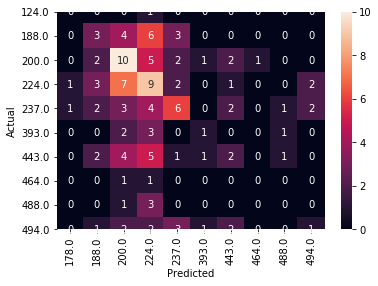

In [80]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')
plt.show()

#### SUPPORT VECTOR MACHINE 

##### rbf Kernel 

In [81]:
X_tr, X_tst, y_tr, y_tst = train_test_split(X, y, test_size=25/100,random_state=109)
clf = svm.SVC(kernel='rbf') # creating Support Vector Machine model
clf.fit(X_tr, y_tr) # training the Model
y_pr = clf.predict(X_tst) # making Predictions

# Evaluating Prediction Accuracy
print("Accuracy:",metrics.accuracy_score(y_tst, y_pr)*100,"%")

Accuracy: 24.409448818897637 %


##### Polynomial Kernel


In [82]:
X_tr, X_tst, y_tr, y_tst = train_test_split(X, y, test_size=25/100,random_state=109)
clf = svm.SVC(kernel='poly') # Creating Support Vector Machine Model
clf.fit(X_tr,y_tr) # fit classifier to training set
y_pr = clf.predict(X_tst) # Making Predictions

# Evaluating Prediction Accuracy
print("Accuracy:",metrics.accuracy_score(y_tst, y_pr)*100,"%")

Accuracy: 21.25984251968504 %


##### Sigmoid Kernel 

In [83]:
X_tr, X_tst, y_tr, y_tst = train_test_split(X, y, test_size=25/100,random_state=109)
clf=svm.SVC(kernel='sigmoid') # instantiate classifier with sigmoid kernel
clf.fit(X_tr,y_tr) # fit classifier to training set
y_pr = clf.predict(X_tst) # Making Predictions

# Evaluating Prediction Accuracy
print("Accuracy:",metrics.accuracy_score(y_tst, y_pr)*100,"%")

Accuracy: 25.984251968503933 %


#### DECISION TREE

In [84]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
clf = DecisionTreeClassifier() # Create Decision Tree classifer object
clf = clf.fit(X_train,y_train) # Train Decision Tree Classifer
y_pred = clf.predict(X_test) # Predict the response for test dataset

# how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,"%")

Accuracy: 19.736842105263158 %


#### LOGISTIC REGRESSION 

In [85]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
clf= LogisticRegression( max_iter=100000000)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')

Accuracy:  20.47244094488189 %


#### K-Nearest Neighbor 

Text(0, 0.5, 'Accuracy')

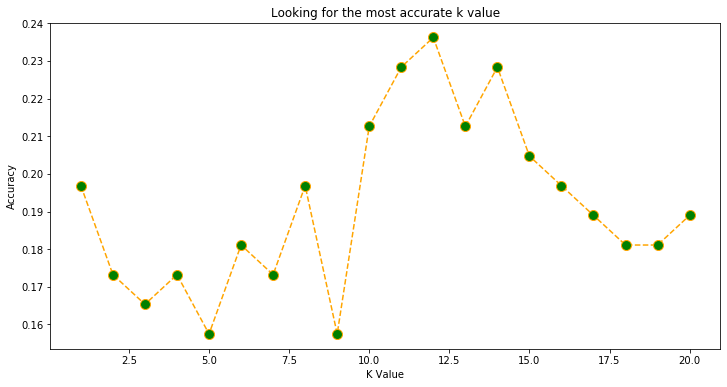

In [86]:
# Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
accuracy=[]
for i in range(1,21):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    ypred = clf.predict(X_test)
    accuracy.append(metrics.accuracy_score(y_test, ypred))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 21), accuracy, color='orange', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=10)
plt.title('Looking for the most accurate k value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

In [87]:
clf = KNeighborsClassifier(n_neighbors=12)
clf.fit(X_train, y_train)
ypred = clf.predict(X_test)

# Best accuracy
print("Accuracy:",metrics.accuracy_score(y_test, ypred)*100,"%")

Accuracy: 23.62204724409449 %


### 7 MOST COMMON ODOR NAMES 

In [63]:
sensorama_4 = sensorama_4.sort_values('odor name')

In [89]:
sensorama2_4=[]

for i in range(38, len(sensorama_4)-38):
    if sensorama_4.iloc[i,4] == sensorama_4.iloc[i+38,4] or sensorama_4.iloc[i,4] == sensorama_4.iloc[i-38,4]:
        sensorama2_4.append(sensorama_4.iloc[i,:]) 

sensorama2_4= pd.DataFrame(sensorama2_4)
sensorama2_4

,cid,canonical_smiles,xlogp,odor level,odor name,fsp3,small rings,arom rings,ring blocks,arom blocks,...,atsm4,atsm5,natom,arom bond,arom atom,apol,alogp,alogp2,amr,acid
11069,162418.000000,974.000000,0.555287,4.000000,188.000000,0.671873,-0.878056,-0.631781,-1.106175,-0.644741,...,-0.619532,-0.143594,0.544577,0.000000,0.000000,0.382929,0.678408,0.397569,0.167378,-0.161598
13173,2723653.000000,306.000000,-0.348467,4.000000,188.000000,-1.642601,0.200130,1.183366,0.632666,1.285620,...,0.454418,0.096307,-0.516508,0.000000,0.000000,-0.405350,-0.797318,-0.692031,0.004457,-0.161598
4316,18938.000000,1016.000000,0.138170,4.000000,188.000000,1.352513,-0.878056,-0.631781,-1.106175,-0.644741,...,-0.895942,-0.287748,0.120143,0.000000,0.000000,-0.118771,0.099873,-0.146440,-0.486602,-0.161598
15053,5367850.000000,2309.000000,-0.070389,4.000000,188.000000,0.331554,0.200130,-0.631781,0.632666,-0.644741,...,-0.389531,-0.479776,0.120143,0.000000,0.000000,0.107235,0.394241,0.111532,-0.000215,-0.161598
13014,853433.000000,1776.000000,-0.139908,4.000000,188.000000,-1.642601,0.200130,1.183366,0.632666,1.285620,...,0.316213,0.096307,-0.516508,0.000000,0.000000,-0.405350,-0.827920,-0.704248,0.095503,-0.161598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8299,82229.000000,1052.000000,-0.348467,4.000000,494.000000,0.978124,2.356503,-0.631781,0.632666,-0.644741,...,0.577393,-0.912238,-0.198182,0.000000,0.000000,-0.212547,-0.063688,-0.272911,-0.510484,-0.161598
17555,21149427.000000,1358.000000,-0.070389,4.000000,494.000000,0.416540,0.200130,-0.631781,0.632666,-0.644741,...,0.532007,-0.095721,0.544577,0.000000,0.000000,0.509918,0.106327,-0.141204,0.347494,-0.161598
1684,7921.000000,1575.000000,-1.530300,4.000000,494.000000,0.603735,0.200130,-0.631781,0.632666,-0.644741,...,-1.402864,-1.488854,-1.471484,0.000000,0.000000,-1.590699,-1.245601,-0.828865,-1.807172,-0.161598
14821,5365819.000000,926.000000,0.763846,4.000000,494.000000,-0.087388,-0.878056,-0.631781,-1.106175,-0.644741,...,-0.020813,0.672923,0.862903,0.000000,0.000000,0.829689,0.861677,0.601330,0.811727,-0.161598


In [90]:
count=0
for i in range(1, len(sensorama2_4)):
    if sensorama2_4.iloc[i,4]!= sensorama2_4.iloc[i-1,4]:
        count = count +1
print(count)

7


In [91]:
X = sensorama2_4[[ 'xlogp','fsp3', 'small rings','arom rings','ring blocks','arom blocks','rings 3','rings 4', 'rings 5', 'rings 6',
               'rings 7', 'rings 8', 'rings 9', 'tpsa efficiency', 'zagreb indices', 'weiner path', 'weiner polarity', 'wtpt.1',
               'wtpt.2', 'wtpt.3', 'wtpt.4', 'wtpt.5', 'molecular weight', 'VAdjMat', 'topoPSA', 'lipinski failures', 'rotatable bonds',
               'topo shape', 'petitjean number', 'mdec.11', 'mdec.12', 'mdec.13', 'mdec.14', 'mdec.22', 'mdec.23', 'mdec.24',
               'mdec.33', 'mdec.34', 'mdec.44', 'mdeo.11', 'mdeo.12', 'mdeo.22', 'mden.11', 'mden.12', 'mden.13', 'mden.22',
               'mden.23', 'mden.33', 'mlogp', 'atom p', 'atom lc', 'khs.sli', 'khs.ssbe', 'khs.ssssbe', 'khs.ssbh', 'khs.sssb',
               'khs.ssssb', 'khs.sch3', 'khs.dch2', 'khs.ssch2', 'khs.tch', 'khs.dsch', 'khs.aach', 'khs.sssch', 'khs.ddc',
               'khs.tsc', 'khs.dssc', 'khs.aasc', 'khs.aaac', 'khs.ssssc', 'khs.snh3', 'khs.snh2', 'khs.ssnh', 'khs.dnh', 'khs.ssnh.1',
               'khs.aanh', 'khs.tn', 'khs.sssnh', 'khs.dsn', 'khs.aan', 'khs.sssn', 'khs.dsn.1', 'khs.aasn', 'khs.ssssn', 'khs.soh',
               'khs.do', 'khs.sso', 'khs.aao', 'khs.sf', 'khs.ssih3', 'khs.sssih2', 'khs.ssssih', 'khs.sssssi', 'khs.sph2',
               'khs.ssph', 'khs.sssp', 'khs.dsssp', 'khs.sssssp', 'khs.ssh', 'khs.ds', 'khs.sss', 'khs.aas', 'khs.dsss', 'khs.ddsss',
               'khs.scl', 'khs.sGeH3', 'khs.ssGeH2', 'khs.sssGeH', 'khs.ssssGe', 'khs.sash2', 'khs.ssash', 'khs.sssas', 'khs.sssdas',
               'khs.sssssas', 'khs.sseh', 'khs.dse', 'khs.ssse', 'khs.aase', 'khs.dssse', 'khs.ddssse', 'khs.sbr', 'khs.ssnh3', 
               'khs.sssnh2', 'khs.ssssnh', 'khs.sssssn', 'khs.si', 'khs.spbh3', 'khs.sspbh2', 'khs.ssspbh', 'khs.sssspb', 'kier 1',
               'kier 2', 'hybRatio', 'hbdon', 'hbacc', 'fragc', 'fmf', 'eccen', 'SP.0', 'SP.1', 'SP.2', 'SP.3', 'SP.4', 'SP.5', 'SP.6',
               'SP.7', 'VP.0', 'VP.1', 'VP.2', 'VP.3', 'VP.4', 'VP.5', 'VP.6', 'VP.7', 'SPC.4', 'SPC.5', 'SPC.6', 'VPC.4', 'VPC.5',
               'VPC.6', 'SC.3', 'SC.4', 'SC.5', 'SC.6', 'VC.3', 'VC.4', 'VC.5', 'VC.6', 'SCH.3', 'SCH.4', 'SCH.5', 'SCH.6', 'SCH.7',
               'VCH.3', 'VCH.4', 'VCH.3', 'VCH.4', 'VCH.5', 'VCH.6', 'VCH.7', 'C1SP1', 'C2SP1', 'C1SP2', 'C2SP2', 'C3SP2', 'C1SP3',
               'C2SP3', 'C3SP3', 'C4SP3', 'bpol', 'bond count', 'basic group count', 'atsp1', 'atsp2' , 'atsp3', 'atsp4', 'atsp5',
               'atsm1', 'atsm2','atsm3','atsm4','atsm5', 'natom','arom bond', 'arom atom', 'apol','alogp', 'alogp2', 'amr', 'acid']]
y = sensorama2_4['odor name']

#### RANDOM FOREST

Accuracy:  21.428571428571427 %


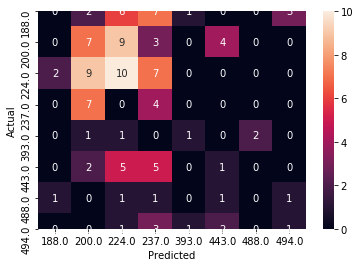

In [92]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')
plt.show()

##### Feature Importances 

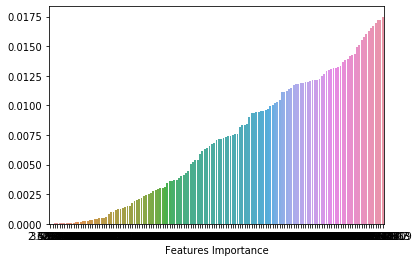

In [93]:
featureImportances = pd.Series(clf.feature_importances_).sort_values(ascending=False)
sns.barplot(x=round(featureImportances,8), y=featureImportances)
plt.xlabel('Features Importance')
plt.show()

In [94]:
X = sensorama2_4[[ 'xlogp','fsp3', 'small rings','arom rings','ring blocks','arom blocks','rings 3','rings 4', 'rings 5', 'rings 6',
               'rings 7', 'tpsa efficiency', 'zagreb indices', 'weiner path', 'weiner polarity', 'wtpt.1',
               'wtpt.2', 'wtpt.3', 'wtpt.4', 'wtpt.5', 'molecular weight', 'VAdjMat', 'topoPSA', 'lipinski failures', 'rotatable bonds',
               'topo shape', 'petitjean number', 'mdec.11', 'mdec.12', 'mdec.13', 'mdec.14', 'mdec.22', 'mdec.23', 'mdec.24',
               'mdec.33', 'mdec.34', 'mdec.44', 'mdeo.11', 'mdeo.12', 'mdeo.22', 'mden.22',
               'mden.23', 'mlogp', 'atom p', 'atom lc',
                  'khs.sch3', 'khs.dch2', 'khs.ssch2','khs.dsch', 'khs.aach', 'khs.sssch', 'khs.ddc',
               'khs.tsc', 'khs.dssc', 'khs.aasc', 'khs.aaac', 'khs.ssssc', 'khs.snh2', 'khs.ssnh.1',
               'khs.tn', 'khs.dsn', 'khs.aan', 'khs.sssn', 'khs.dsn.1', 'khs.aasn', 'khs.soh',
               'khs.do', 'khs.sso', 'khs.aao','khs.ssh', 'khs.ds', 'khs.sss', 'khs.aas', 'khs.dsss','kier 1',
               'kier 2', 'hybRatio', 'hbdon', 'hbacc', 'fragc', 'fmf', 'eccen', 'SP.0', 'SP.1', 'SP.2', 'SP.3', 'SP.4', 'SP.5', 'SP.6',
               'SP.7', 'VP.0', 'VP.1', 'VP.2', 'VP.3', 'VP.4', 'VP.5', 'VP.6', 'VP.7', 'SPC.4', 'SPC.5', 'SPC.6', 'VPC.4', 'VPC.5',
               'VPC.6', 'SC.3', 'SC.4', 'SC.5', 'SC.6', 'VC.3', 'VC.4', 'VC.5', 'VC.6', 'SCH.3', 'SCH.4', 'SCH.5', 'SCH.6', 'SCH.7',
               'VCH.3', 'VCH.4', 'VCH.3', 'VCH.4', 'VCH.5', 'VCH.6', 'VCH.7', 'C1SP1', 'C2SP1', 'C1SP2', 'C2SP2', 'C3SP2', 'C1SP3',
               'C2SP3', 'C3SP3', 'C4SP3', 'bpol', 'bond count', 'atsp1', 'atsp2' , 'atsp3', 'atsp4', 'atsp5',
               'atsm1', 'atsm2','atsm3','atsm4','atsm5', 'natom', 'apol','alogp', 'alogp2', 'amr', 'acid']]
y = sensorama2_4['odor name']

Accuracy:  21.428571428571427 %


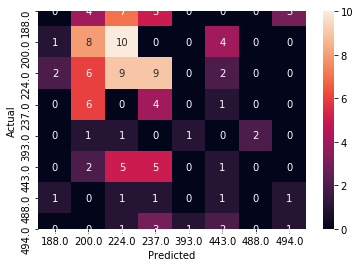

In [95]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')
plt.show()

#### SUPPORT VECTOR MACHINE 

##### rbf Kernel 

In [96]:
X_tr, X_tst, y_tr, y_tst = train_test_split(X, y, test_size=25/100,random_state=109)
clf = svm.SVC(kernel='rbf') # creating Support Vector Machine model
clf.fit(X_tr, y_tr) # training the Model
y_pr = clf.predict(X_tst) # making Predictions

# Evaluating Prediction Accuracy
print("Accuracy:",metrics.accuracy_score(y_tst, y_pr)*100,"%")

Accuracy: 35.714285714285715 %


##### Polynomial Kernel


In [97]:
X_tr, X_tst, y_tr, y_tst = train_test_split(X, y, test_size=25/100,random_state=109)
clf = svm.SVC(kernel='poly') # Creating Support Vector Machine Model
clf.fit(X_tr,y_tr) # fit classifier to training set
y_pr = clf.predict(X_tst) # Making Predictions

# Evaluating Prediction Accuracy
print("Accuracy:",metrics.accuracy_score(y_tst, y_pr)*100,"%")

Accuracy: 32.142857142857146 %


##### Sigmoid Kernel 

In [98]:
X_tr, X_tst, y_tr, y_tst = train_test_split(X, y, test_size=25/100,random_state=109)
clf=svm.SVC(kernel='sigmoid') # instantiate classifier with sigmoid kernel
clf.fit(X_tr,y_tr) # fit classifier to training set
y_pr = clf.predict(X_tst) # Making Predictions

# Evaluating Prediction Accuracy
print("Accuracy:",metrics.accuracy_score(y_tst, y_pr)*100,"%")

Accuracy: 33.92857142857143 %


#### DECISION TREE

In [99]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
clf = DecisionTreeClassifier() # Create Decision Tree classifer object
clf = clf.fit(X_train,y_train) # Train Decision Tree Classifer
y_pred = clf.predict(X_test) # Predict the response for test dataset

# how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,"%")

Accuracy: 12.592592592592592 %


#### LOGISTIC REGRESSION 

In [100]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
clf= LogisticRegression( max_iter=100000000)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')

Accuracy:  25.0 %


#### K-Nearest Neighbor 

Text(0, 0.5, 'Accuracy')

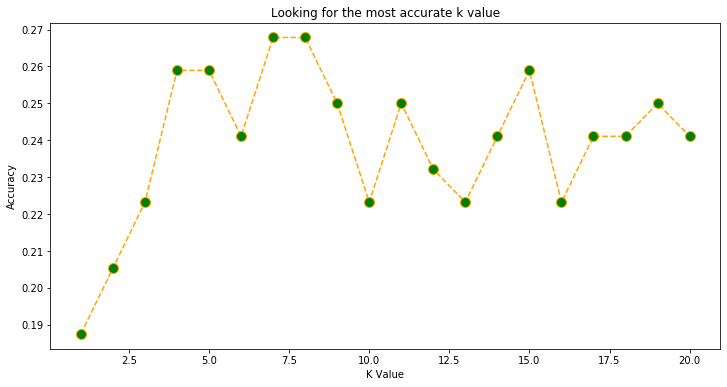

In [101]:
# Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
accuracy=[]
for i in range(1,21):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    ypred = clf.predict(X_test)
    accuracy.append(metrics.accuracy_score(y_test, ypred))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 21), accuracy, color='orange', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=10)
plt.title('Looking for the most accurate k value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

In [102]:
clf = KNeighborsClassifier(n_neighbors=7)
clf.fit(X_train, y_train)
ypred = clf.predict(X_test)

# Best accuracy
print("Accuracy:",metrics.accuracy_score(y_test, ypred)*100,"%")

Accuracy: 26.785714285714285 %


### 5 MOST COMMON ODOR NAMES 

In [78]:
sensorama_4 = sensorama_4 .sort_values('odor name')

In [103]:
sensorama2_4=[]

for i in range(48, len(sensorama_4)-48):
    if sensorama_4.iloc[i,4] == sensorama_4.iloc[i+48,4] or sensorama_4.iloc[i,4] == sensorama_4.iloc[i-48,4]:
        sensorama2_4.append(sensorama_4.iloc[i,:]) 

sensorama2_4= pd.DataFrame(sensorama2_4)
sensorama2_4

,cid,canonical_smiles,xlogp,odor level,odor name,fsp3,small rings,arom rings,ring blocks,arom blocks,...,atsm4,atsm5,natom,arom bond,arom atom,apol,alogp,alogp2,amr,acid
11069,162418.000000,974.000000,0.555287,4.000000,188.000000,0.671873,-0.878056,-0.631781,-1.106175,-0.644741,...,-0.619532,-0.143594,0.544577,0.000000,0.000000,0.382929,0.678408,0.397569,0.167378,-0.161598
13173,2723653.000000,306.000000,-0.348467,4.000000,188.000000,-1.642601,0.200130,1.183366,0.632666,1.285620,...,0.454418,0.096307,-0.516508,0.000000,0.000000,-0.405350,-0.797318,-0.692031,0.004457,-0.161598
4316,18938.000000,1016.000000,0.138170,4.000000,188.000000,1.352513,-0.878056,-0.631781,-1.106175,-0.644741,...,-0.895942,-0.287748,0.120143,0.000000,0.000000,-0.118771,0.099873,-0.146440,-0.486602,-0.161598
15053,5367850.000000,2309.000000,-0.070389,4.000000,188.000000,0.331554,0.200130,-0.631781,0.632666,-0.644741,...,-0.389531,-0.479776,0.120143,0.000000,0.000000,0.107235,0.394241,0.111532,-0.000215,-0.161598
13014,853433.000000,1776.000000,-0.139908,4.000000,188.000000,-1.642601,0.200130,1.183366,0.632666,1.285620,...,0.316213,0.096307,-0.516508,0.000000,0.000000,-0.405350,-0.827920,-0.704248,0.095503,-0.161598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10242,109413.000000,1948.000000,0.763846,4.000000,494.000000,1.040647,-0.878056,-0.631781,-1.106175,-0.644741,...,-0.020813,0.528769,0.969011,0.000000,0.000000,0.785612,0.765914,0.492972,0.415325,-0.161598
4287,18756.000000,359.000000,1.041924,4.000000,494.000000,-0.893823,-0.878056,-0.631781,-1.106175,-0.644741,...,-0.941840,-0.815957,-0.304291,0.000000,0.000000,-0.295448,0.822400,0.556387,-0.189373,-0.161598
9609,103310.000000,1882.000000,1.041924,4.000000,494.000000,1.040647,-0.878056,-0.631781,-1.106175,-0.644741,...,-0.205428,-0.143594,0.969011,0.000000,0.000000,0.785612,1.141056,0.941035,0.426586,-0.161598
5630,41690.000000,181.000000,0.416248,4.000000,494.000000,1.040647,1.278317,-0.631781,2.371507,-0.644741,...,0.255597,-0.047314,0.438469,0.000000,0.000000,0.427016,0.473419,0.187575,0.104729,-0.161598


In [104]:
count=0
for i in range(1, len(sensorama2_4)):
    if sensorama2_4.iloc[i,4]!= sensorama2_4.iloc[i-1,4]:
        count = count +1
print(count)

5


In [105]:
X = sensorama2_4[[ 'xlogp','fsp3', 'small rings','arom rings','ring blocks','arom blocks','rings 3','rings 4', 'rings 5', 'rings 6',
               'rings 7', 'rings 8', 'rings 9', 'tpsa efficiency', 'zagreb indices', 'weiner path', 'weiner polarity', 'wtpt.1',
               'wtpt.2', 'wtpt.3', 'wtpt.4', 'wtpt.5', 'molecular weight', 'VAdjMat', 'topoPSA', 'lipinski failures', 'rotatable bonds',
               'topo shape', 'petitjean number', 'mdec.11', 'mdec.12', 'mdec.13', 'mdec.14', 'mdec.22', 'mdec.23', 'mdec.24',
               'mdec.33', 'mdec.34', 'mdec.44', 'mdeo.11', 'mdeo.12', 'mdeo.22', 'mden.11', 'mden.12', 'mden.13', 'mden.22',
               'mden.23', 'mden.33', 'mlogp', 'atom p', 'atom lc', 'khs.sli', 'khs.ssbe', 'khs.ssssbe', 'khs.ssbh', 'khs.sssb',
               'khs.ssssb', 'khs.sch3', 'khs.dch2', 'khs.ssch2', 'khs.tch', 'khs.dsch', 'khs.aach', 'khs.sssch', 'khs.ddc',
               'khs.tsc', 'khs.dssc', 'khs.aasc', 'khs.aaac', 'khs.ssssc', 'khs.snh3', 'khs.snh2', 'khs.ssnh', 'khs.dnh', 'khs.ssnh.1',
               'khs.aanh', 'khs.tn', 'khs.sssnh', 'khs.dsn', 'khs.aan', 'khs.sssn', 'khs.dsn.1', 'khs.aasn', 'khs.ssssn', 'khs.soh',
               'khs.do', 'khs.sso', 'khs.aao', 'khs.sf', 'khs.ssih3', 'khs.sssih2', 'khs.ssssih', 'khs.sssssi', 'khs.sph2',
               'khs.ssph', 'khs.sssp', 'khs.dsssp', 'khs.sssssp', 'khs.ssh', 'khs.ds', 'khs.sss', 'khs.aas', 'khs.dsss', 'khs.ddsss',
               'khs.scl', 'khs.sGeH3', 'khs.ssGeH2', 'khs.sssGeH', 'khs.ssssGe', 'khs.sash2', 'khs.ssash', 'khs.sssas', 'khs.sssdas',
               'khs.sssssas', 'khs.sseh', 'khs.dse', 'khs.ssse', 'khs.aase', 'khs.dssse', 'khs.ddssse', 'khs.sbr', 'khs.ssnh3', 
               'khs.sssnh2', 'khs.ssssnh', 'khs.sssssn', 'khs.si', 'khs.spbh3', 'khs.sspbh2', 'khs.ssspbh', 'khs.sssspb', 'kier 1',
               'kier 2', 'hybRatio', 'hbdon', 'hbacc', 'fragc', 'fmf', 'eccen', 'SP.0', 'SP.1', 'SP.2', 'SP.3', 'SP.4', 'SP.5', 'SP.6',
               'SP.7', 'VP.0', 'VP.1', 'VP.2', 'VP.3', 'VP.4', 'VP.5', 'VP.6', 'VP.7', 'SPC.4', 'SPC.5', 'SPC.6', 'VPC.4', 'VPC.5',
               'VPC.6', 'SC.3', 'SC.4', 'SC.5', 'SC.6', 'VC.3', 'VC.4', 'VC.5', 'VC.6', 'SCH.3', 'SCH.4', 'SCH.5', 'SCH.6', 'SCH.7',
               'VCH.3', 'VCH.4', 'VCH.3', 'VCH.4', 'VCH.5', 'VCH.6', 'VCH.7', 'C1SP1', 'C2SP1', 'C1SP2', 'C2SP2', 'C3SP2', 'C1SP3',
               'C2SP3', 'C3SP3', 'C4SP3', 'bpol', 'bond count', 'basic group count', 'atsp1', 'atsp2' , 'atsp3', 'atsp4', 'atsp5',
               'atsm1', 'atsm2','atsm3','atsm4','atsm5', 'natom','arom bond', 'arom atom', 'apol','alogp', 'alogp2', 'amr', 'acid']]
y = sensorama2_4['odor name']

#### RANDOM FOREST

Accuracy:  31.03448275862069 %


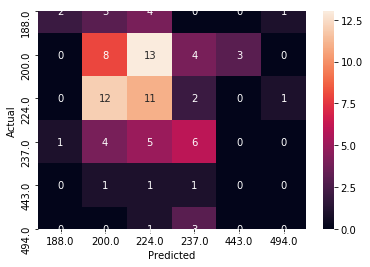

In [106]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')
plt.show()

##### Feature Importances 

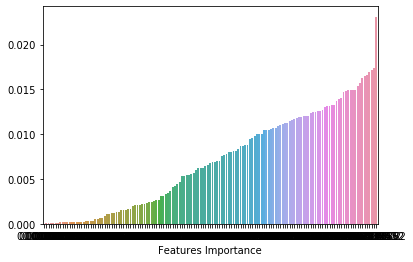

In [107]:
featureImportances = pd.Series(clf.feature_importances_).sort_values(ascending=False)
sns.barplot(x=round(featureImportances,8), y=featureImportances)
plt.xlabel('Features Importance')
plt.show()

In [109]:
X = sensorama2_4[[ 'xlogp','fsp3', 'small rings','arom rings','ring blocks','arom blocks','rings 3','rings 4', 'rings 5', 'rings 6',
               'rings 7', 'tpsa efficiency', 'zagreb indices', 'weiner path', 'weiner polarity', 'wtpt.1',
               'wtpt.2', 'wtpt.3', 'wtpt.4', 'wtpt.5', 'molecular weight', 'VAdjMat', 'topoPSA', 'lipinski failures', 'rotatable bonds',
               'topo shape', 'petitjean number', 'mdec.11', 'mdec.12', 'mdec.13', 'mdec.14', 'mdec.22', 'mdec.23', 'mdec.24',
               'mdec.33', 'mdec.34', 'mdec.44', 'mdeo.11', 'mdeo.12', 'mdeo.22', 'mden.22',
               'mden.23', 'mlogp', 'atom p', 'atom lc',
                  'khs.sch3', 'khs.dch2', 'khs.ssch2','khs.dsch', 'khs.aach', 'khs.sssch', 'khs.ddc',
               'khs.tsc', 'khs.dssc', 'khs.aasc', 'khs.aaac', 'khs.ssssc', 'khs.snh2', 'khs.ssnh.1',
               'khs.tn', 'khs.dsn', 'khs.aan', 'khs.sssn', 'khs.dsn.1', 'khs.aasn', 'khs.soh',
               'khs.do', 'khs.sso', 'khs.aao','khs.ssh', 'khs.ds', 'khs.sss', 'khs.aas', 'khs.dsss','kier 1',
               'kier 2', 'hybRatio', 'hbdon', 'hbacc', 'fragc', 'fmf', 'eccen', 'SP.0', 'SP.1', 'SP.2', 'SP.3', 'SP.4', 'SP.5', 'SP.6',
               'SP.7', 'VP.0', 'VP.1', 'VP.2', 'VP.3', 'VP.4', 'VP.5', 'VP.6', 'VP.7', 'SPC.4', 'SPC.5', 'SPC.6', 'VPC.4', 'VPC.5',
               'VPC.6', 'SC.3', 'SC.4', 'SC.5', 'SC.6', 'VC.3', 'VC.4', 'VC.5', 'VC.6', 'SCH.3', 'SCH.4', 'SCH.5', 'SCH.6', 'SCH.7',
               'VCH.3', 'VCH.4', 'VCH.3', 'VCH.4', 'VCH.5', 'VCH.6', 'VCH.7', 'C1SP1', 'C2SP1', 'C1SP2', 'C2SP2', 'C3SP2', 'C1SP3',
               'C2SP3', 'C3SP3', 'C4SP3', 'bpol', 'bond count', 'atsp1', 'atsp2' , 'atsp3', 'atsp4', 'atsp5',
               'atsm1', 'atsm2','atsm3','atsm4','atsm5', 'natom', 'apol','alogp', 'alogp2', 'amr', 'acid']]
y = sensorama2_4['odor name']

Accuracy:  27.586206896551722 %


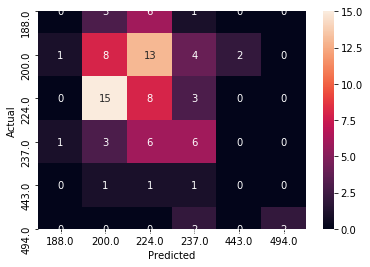

In [110]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')
plt.show()

#### SUPPORT VECTOR MACHINE 

##### rbf Kernel 

In [111]:
X_tr, X_tst, y_tr, y_tst = train_test_split(X, y, test_size=25/100,random_state=109)
clf = svm.SVC(kernel='rbf') # creating Support Vector Machine model
clf.fit(X_tr, y_tr) # training the Model
y_pr = clf.predict(X_tst) # making Predictions

# Evaluating Prediction Accuracy
print("Accuracy:",metrics.accuracy_score(y_tst, y_pr)*100,"%")

Accuracy: 42.5287356321839 %


##### Polynomial Kernel


In [112]:
X_tr, X_tst, y_tr, y_tst = train_test_split(X, y, test_size=25/100,random_state=109)
clf = svm.SVC(kernel='poly') # Creating Support Vector Machine Model
clf.fit(X_tr,y_tr) # fit classifier to training set
y_pr = clf.predict(X_tst) # Making Predictions

# Evaluating Prediction Accuracy
print("Accuracy:",metrics.accuracy_score(y_tst, y_pr)*100,"%")

Accuracy: 36.7816091954023 %


##### Sigmoid Kernel 

In [113]:
X_tr, X_tst, y_tr, y_tst = train_test_split(X, y, test_size=25/100,random_state=109)
clf=svm.SVC(kernel='sigmoid') # instantiate classifier with sigmoid kernel
clf.fit(X_tr,y_tr) # fit classifier to training set
y_pr = clf.predict(X_tst) # Making Predictions

# Evaluating Prediction Accuracy
print("Accuracy:",metrics.accuracy_score(y_tst, y_pr)*100,"%")

Accuracy: 33.33333333333333 %


#### DECISION TREE

In [114]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
clf = DecisionTreeClassifier() # Create Decision Tree classifer object
clf = clf.fit(X_train,y_train) # Train Decision Tree Classifer
y_pred = clf.predict(X_test) # Predict the response for test dataset

# how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,"%")

Accuracy: 26.923076923076923 %


#### LOGISTIC REGRESSION 

In [115]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
clf= LogisticRegression( max_iter=100000000)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')

Accuracy:  27.586206896551722 %


#### K-Nearest Neighbor 

Text(0, 0.5, 'Accuracy')

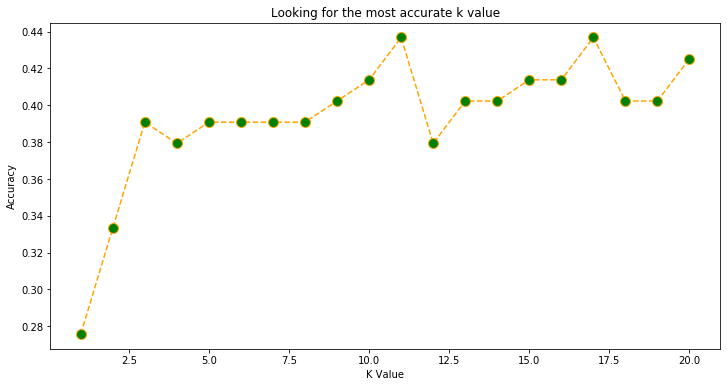

In [116]:
# Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
accuracy=[]
for i in range(1,21):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    ypred = clf.predict(X_test)
    accuracy.append(metrics.accuracy_score(y_test, ypred))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 21), accuracy, color='orange', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=10)
plt.title('Looking for the most accurate k value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

In [117]:
clf = KNeighborsClassifier(n_neighbors=11)
clf.fit(X_train, y_train)
ypred = clf.predict(X_test)

# Best accuracy
print("Accuracy:",metrics.accuracy_score(y_test, ypred)*100,"%")

Accuracy: 43.67816091954023 %


### 3 MOST COMMON ODOR NAMES 

In [93]:
sensorama_4 = sensorama_4 .sort_values('odor name')

In [126]:
sensorama2_4=[]

for i in range(68, len(sensorama_4)-68):
    if sensorama_4.iloc[i,4] == sensorama_4.iloc[i+68,4] or sensorama_4.iloc[i,4] == sensorama_4.iloc[i-68,4]:
        sensorama2_4.append(sensorama_4.iloc[i,:]) 

sensorama2_4= pd.DataFrame(sensorama2_4)
sensorama2_4

,cid,canonical_smiles,xlogp,odor level,odor name,fsp3,small rings,arom rings,ring blocks,arom blocks,...,atsm4,atsm5,natom,arom bond,arom atom,apol,alogp,alogp2,amr,acid
7881,74786.000000,3159.000000,-0.904624,4.000000,200.000000,-0.252119,-0.878056,-0.631781,-1.106175,-0.644741,...,-0.942351,-0.672337,-0.834833,0.000000,0.000000,-0.951136,-0.617935,-0.611934,-1.067295,-0.161598
7821,74008.000000,2969.000000,0.068650,4.000000,200.000000,-0.519433,0.200130,1.183366,0.632666,1.285620,...,0.008638,0.239913,-0.198182,0.000000,0.000000,-0.184596,-0.582336,-0.594308,-0.069191,-0.161598
13104,1550577.000000,751.000000,-0.000869,4.000000,200.000000,0.229345,-0.878056,-0.631781,-1.106175,-0.644741,...,-0.711839,-0.239875,0.014035,0.000000,0.000000,-0.074694,0.339906,0.060974,-0.185074,-0.161598
5758,60998.000000,883.000000,0.277209,4.000000,200.000000,-0.831300,0.200130,1.183366,0.632666,1.285620,...,0.116880,0.288334,0.120143,0.000000,0.000000,0.234213,-0.002344,-0.226884,0.501948,-0.161598
17468,19693163.000000,834.000000,8.550039,4.000000,200.000000,0.936567,-0.878056,-0.631781,-1.106175,-0.644741,...,3.479700,4.324099,8.396606,0.000000,0.000000,8.322480,7.926577,19.983361,7.840372,-0.161598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9679,103719.000000,3370.000000,-0.487506,4.000000,237.000000,0.671873,3.434689,-0.631781,0.632666,-0.644741,...,0.163289,-0.143594,-0.092074,0.000000,0.000000,-0.030618,-0.453333,-0.525690,-0.176012,-0.161598
2639,10362.000000,1621.000000,-0.070389,4.000000,237.000000,0.978124,0.200130,-0.631781,0.632666,-0.644741,...,0.025084,-0.431902,0.014035,0.000000,0.000000,-0.074694,0.102510,-0.144293,-0.381175,-0.161598
9629,103402.000000,2532.000000,0.972405,4.000000,237.000000,1.064608,0.200130,-0.631781,0.632666,-0.644741,...,0.992009,0.096840,0.969011,0.000000,0.000000,0.884639,1.285742,1.130780,0.513994,-0.161598
11078,162452.000000,1094.000000,-0.000869,4.000000,494.000000,0.776702,1.278317,-0.631781,0.632666,-0.644741,...,1.084827,0.721330,0.756794,0.000000,0.000000,0.746787,0.353021,0.073061,0.519333,-0.161598


In [127]:
count=0
for i in range(1, len(sensorama2_4)):
    if sensorama2_4.iloc[i,4]!= sensorama2_4.iloc[i-1,4]:
        count = count +1
print(count)

3


In [128]:
X = sensorama2_4[[ 'xlogp','fsp3', 'small rings','arom rings','ring blocks','arom blocks','rings 3','rings 4', 'rings 5', 'rings 6',
               'rings 7', 'rings 8', 'rings 9', 'tpsa efficiency', 'zagreb indices', 'weiner path', 'weiner polarity', 'wtpt.1',
               'wtpt.2', 'wtpt.3', 'wtpt.4', 'wtpt.5', 'molecular weight', 'VAdjMat', 'topoPSA', 'lipinski failures', 'rotatable bonds',
               'topo shape', 'petitjean number', 'mdec.11', 'mdec.12', 'mdec.13', 'mdec.14', 'mdec.22', 'mdec.23', 'mdec.24',
               'mdec.33', 'mdec.34', 'mdec.44', 'mdeo.11', 'mdeo.12', 'mdeo.22', 'mden.11', 'mden.12', 'mden.13', 'mden.22',
               'mden.23', 'mden.33', 'mlogp', 'atom p', 'atom lc', 'khs.sli', 'khs.ssbe', 'khs.ssssbe', 'khs.ssbh', 'khs.sssb',
               'khs.ssssb', 'khs.sch3', 'khs.dch2', 'khs.ssch2', 'khs.tch', 'khs.dsch', 'khs.aach', 'khs.sssch', 'khs.ddc',
               'khs.tsc', 'khs.dssc', 'khs.aasc', 'khs.aaac', 'khs.ssssc', 'khs.snh3', 'khs.snh2', 'khs.ssnh', 'khs.dnh', 'khs.ssnh.1',
               'khs.aanh', 'khs.tn', 'khs.sssnh', 'khs.dsn', 'khs.aan', 'khs.sssn', 'khs.dsn.1', 'khs.aasn', 'khs.ssssn', 'khs.soh',
               'khs.do', 'khs.sso', 'khs.aao', 'khs.sf', 'khs.ssih3', 'khs.sssih2', 'khs.ssssih', 'khs.sssssi', 'khs.sph2',
               'khs.ssph', 'khs.sssp', 'khs.dsssp', 'khs.sssssp', 'khs.ssh', 'khs.ds', 'khs.sss', 'khs.aas', 'khs.dsss', 'khs.ddsss',
               'khs.scl', 'khs.sGeH3', 'khs.ssGeH2', 'khs.sssGeH', 'khs.ssssGe', 'khs.sash2', 'khs.ssash', 'khs.sssas', 'khs.sssdas',
               'khs.sssssas', 'khs.sseh', 'khs.dse', 'khs.ssse', 'khs.aase', 'khs.dssse', 'khs.ddssse', 'khs.sbr', 'khs.ssnh3', 
               'khs.sssnh2', 'khs.ssssnh', 'khs.sssssn', 'khs.si', 'khs.spbh3', 'khs.sspbh2', 'khs.ssspbh', 'khs.sssspb', 'kier 1',
               'kier 2', 'hybRatio', 'hbdon', 'hbacc', 'fragc', 'fmf', 'eccen', 'SP.0', 'SP.1', 'SP.2', 'SP.3', 'SP.4', 'SP.5', 'SP.6',
               'SP.7', 'VP.0', 'VP.1', 'VP.2', 'VP.3', 'VP.4', 'VP.5', 'VP.6', 'VP.7', 'SPC.4', 'SPC.5', 'SPC.6', 'VPC.4', 'VPC.5',
               'VPC.6', 'SC.3', 'SC.4', 'SC.5', 'SC.6', 'VC.3', 'VC.4', 'VC.5', 'VC.6', 'SCH.3', 'SCH.4', 'SCH.5', 'SCH.6', 'SCH.7',
               'VCH.3', 'VCH.4', 'VCH.3', 'VCH.4', 'VCH.5', 'VCH.6', 'VCH.7', 'C1SP1', 'C2SP1', 'C1SP2', 'C2SP2', 'C3SP2', 'C1SP3',
               'C2SP3', 'C3SP3', 'C4SP3', 'bpol', 'bond count', 'basic group count', 'atsp1', 'atsp2' , 'atsp3', 'atsp4', 'atsp5',
               'atsm1', 'atsm2','atsm3','atsm4','atsm5', 'natom','arom bond', 'arom atom', 'apol','alogp', 'alogp2', 'amr', 'acid']]
y = sensorama2_4['odor name']

#### RANDOM FOREST

Accuracy:  48.64864864864865 %


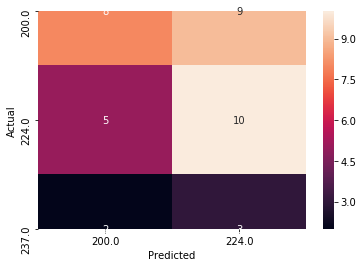

In [129]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')
plt.show()

##### Feature Importances 

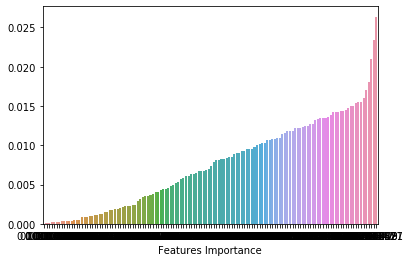

In [130]:
featureImportances = pd.Series(clf.feature_importances_).sort_values(ascending=False)
sns.barplot(x=round(featureImportances,8), y=featureImportances)
plt.xlabel('Features Importance')
plt.show()

In [132]:
X = sensorama2_4[[ 'xlogp','fsp3', 'small rings','arom rings','ring blocks','arom blocks','rings 3','rings 4', 'rings 5', 'rings 6',
               'rings 7', 'tpsa efficiency', 'zagreb indices', 'weiner path', 'weiner polarity', 'wtpt.1',
               'wtpt.2', 'wtpt.3', 'wtpt.4', 'wtpt.5', 'molecular weight', 'VAdjMat', 'topoPSA', 'lipinski failures', 'rotatable bonds',
               'topo shape', 'petitjean number', 'mdec.11', 'mdec.12', 'mdec.13', 'mdec.14', 'mdec.22', 'mdec.23', 'mdec.24',
               'mdec.33', 'mdec.34', 'mdec.44', 'mdeo.11', 'mdeo.12', 'mdeo.22', 'mden.22',
               'mden.23', 'mlogp', 'atom p', 'atom lc',
                  'khs.sch3', 'khs.dch2', 'khs.ssch2','khs.dsch', 'khs.aach', 'khs.sssch', 'khs.ddc',
               'khs.tsc', 'khs.dssc', 'khs.aasc', 'khs.aaac', 'khs.ssssc', 'khs.snh2', 'khs.ssnh.1',
               'khs.tn', 'khs.dsn', 'khs.aan', 'khs.sssn', 'khs.dsn.1', 'khs.aasn', 'khs.soh',
               'khs.do', 'khs.sso', 'khs.aao','khs.ssh', 'khs.ds', 'khs.sss', 'khs.aas', 'khs.dsss','kier 1',
               'kier 2', 'hybRatio', 'hbdon', 'hbacc', 'fragc', 'fmf', 'eccen', 'SP.0', 'SP.1', 'SP.2', 'SP.3', 'SP.4', 'SP.5', 'SP.6',
               'SP.7', 'VP.0', 'VP.1', 'VP.2', 'VP.3', 'VP.4', 'VP.5', 'VP.6', 'VP.7', 'SPC.4', 'SPC.5', 'SPC.6', 'VPC.4', 'VPC.5',
               'VPC.6', 'SC.3', 'SC.4', 'SC.5', 'SC.6', 'VC.3', 'VC.4', 'VC.5', 'VC.6', 'SCH.3', 'SCH.4', 'SCH.5', 'SCH.6', 'SCH.7',
               'VCH.3', 'VCH.4', 'VCH.3', 'VCH.4', 'VCH.5', 'VCH.6', 'VCH.7', 'C1SP1', 'C2SP1', 'C1SP2', 'C2SP2', 'C3SP2', 'C1SP3',
               'C2SP3', 'C3SP3', 'C4SP3', 'bpol', 'bond count', 'atsp1', 'atsp2' , 'atsp3', 'atsp4', 'atsp5',
               'atsm1', 'atsm2','atsm3','atsm4','atsm5', 'natom', 'apol','alogp', 'alogp2', 'amr', 'acid']]
y = sensorama2_4['odor name']

Accuracy:  54.054054054054056 %


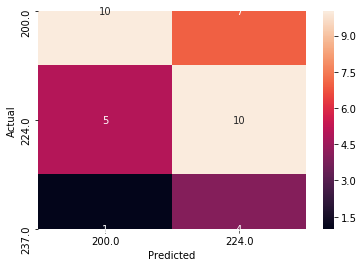

In [133]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')
plt.show()

#### SUPPORT VECTOR MACHINE 

##### rbf Kernel 

In [134]:
X_tr, X_tst, y_tr, y_tst = train_test_split(X, y, test_size=25/100,random_state=109)
clf = svm.SVC(kernel='rbf') # creating Support Vector Machine model
clf.fit(X_tr, y_tr) # training the Model
y_pr = clf.predict(X_tst) # making Predictions

# Evaluating Prediction Accuracy
print("Accuracy:",metrics.accuracy_score(y_tst, y_pr)*100,"%")

Accuracy: 43.24324324324324 %


##### Polynomial Kernel


In [135]:
X_tr, X_tst, y_tr, y_tst = train_test_split(X, y, test_size=25/100,random_state=109)
clf = svm.SVC(kernel='poly') # Creating Support Vector Machine Model
clf.fit(X_tr,y_tr) # fit classifier to training set
y_pr = clf.predict(X_tst) # Making Predictions

# Evaluating Prediction Accuracy
print("Accuracy:",metrics.accuracy_score(y_tst, y_pr)*100,"%")

Accuracy: 54.054054054054056 %


##### Sigmoid Kernel 

In [136]:
X_tr, X_tst, y_tr, y_tst = train_test_split(X, y, test_size=25/100,random_state=109)
clf=svm.SVC(kernel='sigmoid') # instantiate classifier with sigmoid kernel
clf.fit(X_tr,y_tr) # fit classifier to training set
y_pr = clf.predict(X_tst) # Making Predictions

# Evaluating Prediction Accuracy
print("Accuracy:",metrics.accuracy_score(y_tst, y_pr)*100,"%")

Accuracy: 51.35135135135135 %


#### DECISION TREE

In [137]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
clf = DecisionTreeClassifier() # Create Decision Tree classifer object
clf = clf.fit(X_train,y_train) # Train Decision Tree Classifer
y_pred = clf.predict(X_test) # Predict the response for test dataset

# how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,"%")

Accuracy: 31.11111111111111 %


#### LOGISTIC REGRESSION 

In [138]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
clf= LogisticRegression( max_iter=100000000)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')

Accuracy:  54.054054054054056 %


#### K-Nearest Neighbor 

Text(0, 0.5, 'Accuracy')

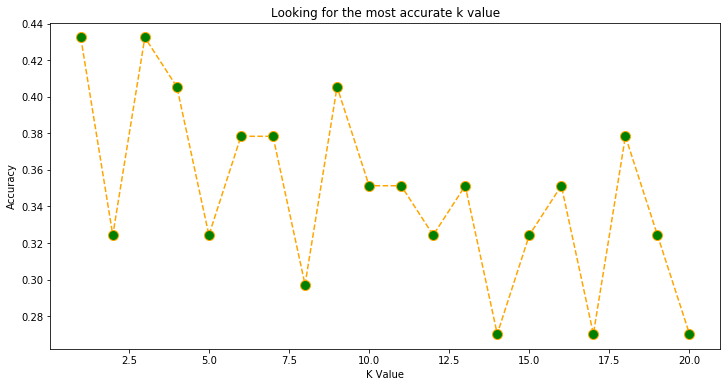

In [139]:
# Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
accuracy=[]
for i in range(1,21):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    ypred = clf.predict(X_test)
    accuracy.append(metrics.accuracy_score(y_test, ypred))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 21), accuracy, color='orange', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=10)
plt.title('Looking for the most accurate k value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

In [140]:
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train, y_train)
ypred = clf.predict(X_test)

# Best accuracy
print("Accuracy:",metrics.accuracy_score(y_test, ypred)*100,"%")

Accuracy: 43.24324324324324 %
